In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding

In [2]:
# read the dataset
df = pd.read_csv(r'C:\Users\SwarnenduSarkar\OneDrive - Invicara\Documents\Upgrad Python Scripts and Docs\Graded Modules\Statistics Essentials\Lending Club Case Study\loan.csv')

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checking the row and column count in the dataset
df.shape
#There are 39717 rows and 111 columns in the dataset.

(39717, 111)

In [4]:
#Checking the datatypes
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### Missing Value Treatment/Dropping unnecessary variables, rows

In [5]:
#Checking if there are any 'null' values in the dataset
df.isnull().sum()
#Looks like there are quite a few columns where the data is not available for all the rows. 
#Keeping them won't make sense as they can't be used for any further analysis.

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
#Dropping the variables which have 'null' data for all rows
df = df.dropna(axis='columns', how='all')
df.shape
#Column count has decreased from 111 to 57

(39717, 57)

In [7]:
#Checking further 'null' values in the dataset
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
#As we can see there are columns with 'null' values, analyzed each one of them consisting 'null' values to check 
# whether the information provided makes sense or not, using 'value_counts()'. The columns 'chargeoff_within_12_mths' and 
# 'tax_liens' have only the value '0.0' apart from 'null'. Given that they mean 'Number of charge-offs within 12 months'
# and 'Number of tax liens', the value '0.0' will not help us in finding any insight. Hence we should drop these 2 columns
df.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [9]:
df.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [10]:
#Dropping 'chargeoff_within_12_mths' and 'tax_liens'
df = df.drop(columns=['chargeoff_within_12_mths', 'tax_liens'])
df.shape
#Column count has decreased from 57 to 55

(39717, 55)

In [11]:
#Finding number of unique values in each variable
df.nunique().sort_values().head(15)

acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
delinq_amnt                   1
pymnt_plan                    1
term                          2
next_pymnt_d                  2
pub_rec_bankruptcies          3
loan_status                   3
verification_status           3
pub_rec                       5
home_ownership                5
grade                         7
dtype: int64

In [12]:
#'delinq_amnt', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status',
# 'pymnt_plan' columns have only one unique value in all the rows, which will not give any usefull info for us.
# So, lets remove them.
df = df.drop(columns=['delinq_amnt', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'])
df.shape
#Column count has decreased from 55 to 48

(39717, 48)

In [13]:
#Finding variables with unique values in all rows.
df.nunique().sort_values(ascending=False)

id                         39717
member_id                  39717
url                        39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
mths_since_last_record       111
last_credit_pull_d           106
last_pymnt_d                 101
mths_since

In [14]:
#'id', 'url', and 'member_id' have all unique values which means any one of these can be used as primary key.
# Since 'url' looks like an API and 'member_id' being uniqiue won't allow us to do any meber level analysis.
# Let's use 'id' primary key and remove 'url' and 'member id' columns.
df = df.drop(columns=['member_id', 'url'])
df.shape
#Column count has decreased from 48 to 46

(39717, 46)

In [15]:
#Finding percentage of null or missing values
null_perc = 100*(df.isnull().sum()/df.shape[0])
null_perc[ null_perc > 0 ]

emp_title                  6.191303
emp_length                 2.706650
desc                      32.580507
title                      0.027696
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
revol_util                 0.125891
last_pymnt_d               0.178765
next_pymnt_d              97.129693
last_credit_pull_d         0.005036
pub_rec_bankruptcies       1.754916
dtype: float64

In [16]:
#Checking the values for 'loan_status' variable
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
#Removing the records which are 'Current' loans, as the business objective is to find out driving factors behind default loans
df = df[df.loan_status != 'Current']
df.shape
#Row count has decreased from 39717 to 38577

(38577, 46)

In [18]:
#Finding percentage of null or missing values again post removal of 'Current' loans
null_perc = 100*(df.isnull().sum()/df.shape[0])
null_perc[null_perc > 0]

emp_title                   6.185033
emp_length                  2.677761
desc                       32.472717
title                       0.028514
mths_since_last_delinq     64.559193
mths_since_last_record     92.897322
revol_util                  0.129611
last_pymnt_d                0.184047
next_pymnt_d              100.000000
last_credit_pull_d          0.005184
pub_rec_bankruptcies        1.806776
dtype: float64

In [19]:
#Dropping column 'next_pymnt_d','mths_since_last_record', 'mths_since_last_delinq', 'desc' as missing value percentages are fairly high
# Using them by imputation may skew the data. 'Desc' column is a free text on why loan application has been requested. 
# Since NLP is out of context for this case study, makes more sense to drop this variable.
df = df.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq', 'desc','emp_title'])
df.shape
#Column count has decreased from 46 to 41

(38577, 41)

In [20]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [21]:
#The below columns are related to an ongoing loan tenure. We won't get this data for a new loan applicant. Hence deleting them.
df = df.drop(columns=['total_pymnt','total_pymnt_inv','total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','out_prncp','out_prncp_inv'])
df.shape
#Column count has decreased from 41 to 29

(38577, 29)

In [22]:
#Finding percentage of null or missing values again
null_perc = 100*(df.isnull().sum()/df.shape[0])
null_perc[null_perc > 0]

emp_length              2.677761
title                   0.028514
revol_util              0.129611
pub_rec_bankruptcies    1.806776
dtype: float64

### Missing Value Imputation

In [23]:
#Checking the values for column: 'emp_length'
df.emp_length.value_counts()
#Since this is the length of employment provided by borrower, we will create a new tag named 'Not known' to impute the missing values.
#General categorical imputation may not make sense. Later bins can be created based on frequency count if required.

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [24]:
#Adding a new category for missing values
df.emp_length.fillna('Not Known',inplace=True)
#Finding percentage of null or missing values again
null_perc = 100*(df.isnull().sum()/df.shape[0])
null_perc[null_perc > 0]

title                   0.028514
revol_util              0.129611
pub_rec_bankruptcies    1.806776
dtype: float64

In [25]:
#Checking the values for column: 'title'
df.title.value_counts()

Debt Consolidation                         2090
Debt Consolidation Loan                    1620
Personal Loan                               641
Consolidation                               491
debt consolidation                          478
Credit Card Consolidation                   348
Home Improvement                            345
Debt consolidation                          322
Small Business Loan                         305
Credit Card Loan                            301
Personal                                    301
Consolidation Loan                          248
Home Improvement Loan                       230
personal loan                               227
personal                                    209
Loan                                        206
Wedding Loan                                201
Car Loan                                    193
consolidation                               193
Other Loan                                  180
Credit Card Payoff                      

In [26]:
#Adding a new category for missing values
df.title.fillna('Not Known',inplace=True)
#Finding percentage of null or missing values again
null_perc = 100*(df.isnull().sum()/df.shape[0])
null_perc[null_perc > 0]

revol_util              0.129611
pub_rec_bankruptcies    1.806776
dtype: float64

In [27]:
#Checking the values for column: 'revol_util'
df.revol_util.value_counts()
#Since 'revol_util' is the amount of credit the borrower uses out of the entire available limit, and it is pretty clear
#that most of the times this is '0%', a mode imputation makes sense

0%        954
63%        62
0.20%      62
40.70%     57
31.20%     57
66.70%     56
61%        56
70.40%     56
37.60%     55
57.40%     55
46.40%     55
66.60%     55
0.10%      55
75.50%     54
32%        54
46.60%     54
64.80%     54
64.60%     54
65.90%     53
25.50%     53
35.30%     53
70.80%     53
49.80%     53
68.70%     53
34.40%     53
48.90%     53
41%        52
72.10%     52
36.50%     52
89.50%     52
         ... 
21.59%      1
0.75%       1
24.63%      1
49.63%      1
27.81%      1
34.89%      1
18.82%      1
0.05%       1
39.95%      1
36.94%      1
37.63%      1
81.31%      1
28.41%      1
58.19%      1
25.33%      1
5.33%       1
23.11%      1
0.04%       1
17.78%      1
33.26%      1
17.67%      1
62.31%      1
32.04%      1
7.28%       1
70.94%      1
77.63%      1
60.69%      1
0.83%       1
33.39%      1
88.48%      1
Name: revol_util, Length: 1088, dtype: int64

In [28]:
#Implementing mode imputation
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].mode()[0])
#Finding percentage of null or missing values again
null_perc = 100*(df.isnull().sum()/df.shape[0])
null_perc[null_perc > 0]

pub_rec_bankruptcies    1.806776
dtype: float64

In [29]:
#Checking the missing values for column: 'pub_rec_bankruptcies'
df.pub_rec_bankruptcies.isnull().sum()

697

In [30]:
#Checking the values for column: 'pub_rec_bankruptcies'
df.pub_rec_bankruptcies.value_counts()
#Since the number of missing values is 697 and the highest category has far more records compared to other categories 
#it makes sense to do a mode imputation

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [31]:
#Implementing mode imputation
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna(df["pub_rec_bankruptcies"].mode()[0])
#Finding percentage of null or missing values again
null_perc = 100*(df.isnull().sum()/df.shape[0])
null_perc[null_perc > 0]

Series([], dtype: float64)

### Data Quality check and transformation

#### Next step is to check every column using 'value_count' and transform the values/change datatypes if required. The follwing steps show only the variables which need to be transformed. The variables which do not need any transformation have been checked individually.

In [32]:
#Column: 'funded_amnt_inv'
df.funded_amnt_inv.value_counts()
#The variable has too many digits after decimals. Let's round it off to 2 digits.

5000.000000     1294
10000.000000    1264
6000.000000     1182
12000.000000    1016
8000.000000      887
4000.000000      806
3000.000000      790
15000.000000     630
7000.000000      596
2000.000000      448
9000.000000      349
2500.000000      331
20000.000000     320
4800.000000      308
9975.000000      290
1000.000000      279
16000.000000     271
3500.000000      266
14000.000000     253
1500.000000      249
7500.000000      242
11975.000000     240
4500.000000      231
2400.000000      224
3600.000000      224
7200.000000      207
5500.000000      192
5975.000000      184
9600.000000      178
19975.000000     174
                ... 
15736.859980       1
29797.565780       1
11865.709030       1
8790.326481        1
5577.118880        1
1435.332298        1
1007.107599        1
8569.908042        1
11930.856930       1
675.004018         1
8994.212002        1
10489.311550       1
28364.692050       1
2171.499547        1
527.489324         1
4199.318024        1
14677.942240 

In [33]:
#Rounding up to 2 digits and checking
df.funded_amnt_inv = df.funded_amnt_inv.round(2)
df.funded_amnt_inv.value_counts()
#Looks better!

5000.00     1294
10000.00    1264
6000.00     1182
12000.00    1016
8000.00      887
4000.00      807
3000.00      791
15000.00     632
7000.00      596
2000.00      449
9000.00      349
2500.00      332
20000.00     320
4800.00      308
9975.00      290
1000.00      281
16000.00     271
3500.00      268
14000.00     253
1500.00      249
7500.00      242
11975.00     240
4500.00      233
2400.00      225
3600.00      225
7200.00      207
5500.00      193
5975.00      185
9600.00      178
18000.00     175
            ... 
18143.13       1
2994.23        1
4232.44        1
11850.16       1
27441.23       1
8328.98        1
2631.47        1
19273.52       1
22374.65       1
9901.96        1
22446.36       1
10949.42       1
13899.41       1
21901.34       1
5412.33        1
4017.73        1
21326.77       1
5923.33        1
4568.35        1
2000.01        1
8211.86        1
8480.12        1
5013.16        1
14461.72       1
2962.29        1
3981.71        1
2475.99        1
5727.38       

In [34]:
#Column: 'funded_amnt_inv'
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [35]:
#Stripping empty space in values in term
df['term'] = df.term.str.strip()
df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [36]:
#Column: 'int_rate'
df.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
10.65%    403
12.42%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
         ... 
14.25%      2
14.88%      2
14.70%      2
16.33%      2
17.03%      2
15.01%      2
14.62%      2
15.38%      2
17.90%      2
14.07%      2
21.82%      2
17.15%      2
15.07%      2
22.94%      1
17.34%      1
16.15%      1
16.01%      1
17.46%      1
17.44%      1
14.67%      1
18.36%      1
20.52%      1
24.40%      1
16.20%      1
22.64%      1
18.72%      1
16.71%      1
16.96%      1
21.48%      1
17.54%      1
Name: int_rate, Length: 370, dtype: int64

In [37]:
#Removing the '%' from the 'int_rate' column and coverting it to float
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1]))
df.int_rate.value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    483
10.37    467
12.69    451
6.03     447
8.49     434
5.79     410
12.99    409
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     386
9.63     378
10.59    358
9.91     357
5.99     347
14.27    344
7.14     341
6.99     336
        ... 
15.83      2
13.84      2
14.62      2
17.15      2
14.07      2
14.88      2
15.38      2
15.01      2
14.25      2
14.70      2
17.03      2
15.07      2
20.20      2
16.20      1
17.54      1
16.96      1
17.44      1
16.15      1
14.67      1
22.94      1
24.40      1
18.36      1
17.34      1
16.01      1
18.72      1
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [38]:
#Column: 'issue_d'
df.issue_d.value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [39]:
#Converting to datetime datatype
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df.issue_d.value_counts()

2011-11-01    2062
2011-12-01    2042
2011-10-01    1941
2011-09-01    1913
2011-08-01    1798
2011-07-01    1745
2011-06-01    1728
2011-05-01    1609
2011-04-01    1559
2011-03-01    1442
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007-07-01  

In [40]:
#Column: 'earliest_cr_line'
df.earliest_cr_line.value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
Nov-99    315
Nov-00    312
Sep-00    299
Oct-98    295
Nov-97    293
Dec-95    287
Dec-99    284
Dec-00    277
Jan-00    276
Sep-01    265
Jul-00    264
Nov-96    263
Aug-00    262
Oct-01    261
Dec-96    259
Oct-02    259
Sep-99    255
Aug-98    250
May-00    250
Apr-00    245
Oct-97    243
Aug-99    242
Oct-03    240
Jan-99    239
Sep-98    237
         ... 
Aug-67      1
Jun-66      1
Feb-67      1
Sep-56      1
Oct-54      1
Dec-50      1
Jun-67      1
Jun-68      1
May-65      1
May-67      1
Sep-63      1
Sep-65      1
Nov-68      1
Nov-62      1
Nov-61      1
Jan-46      1
Nov-65      1
Oct-68      1
Feb-73      1
Oct-69      1
Oct-08      1
Dec-63      1
Apr-66      1
Dec-61      1
Nov-54      1
Apr-69      1
Jun-72      1
Dec-66      1
Dec-65      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [41]:
#Converting to datetime datatype
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
df.earliest_cr_line.value_counts()

1999-10-01    360
1998-11-01    357
2000-10-01    341
1998-12-01    340
1997-12-01    318
1999-11-01    315
2000-11-01    312
2000-09-01    299
1998-10-01    295
1997-11-01    293
1995-12-01    287
1999-12-01    284
2000-12-01    277
2000-01-01    276
2001-09-01    265
2000-07-01    264
1996-11-01    263
2000-08-01    262
2001-10-01    261
1996-12-01    259
2002-10-01    259
1999-09-01    255
1998-08-01    250
2000-05-01    250
2000-04-01    245
1997-10-01    243
1999-08-01    242
2003-10-01    240
1999-01-01    239
1998-09-01    237
             ... 
1961-11-01      1
1974-10-01      1
1963-12-01      1
1968-03-01      1
1966-12-01      1
1965-12-01      1
1954-11-01      1
1968-06-01      1
1969-04-01      1
1965-11-01      1
1967-02-01      1
1973-02-01      1
1968-10-01      1
1959-06-01      1
1972-06-01      1
1966-02-01      1
1956-09-01      1
2008-10-01      1
1965-05-01      1
2008-11-01      1
1963-03-01      1
1969-10-01      1
1966-06-01      1
1950-12-01      1
1965-09-01

In [42]:
#Column: 'purpose'
df.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [43]:
#Column: 'title'
df.title.value_counts()

Debt Consolidation                         2090
Debt Consolidation Loan                    1620
Personal Loan                               641
Consolidation                               491
debt consolidation                          478
Credit Card Consolidation                   348
Home Improvement                            345
Debt consolidation                          322
Small Business Loan                         305
Personal                                    301
Credit Card Loan                            301
Consolidation Loan                          248
Home Improvement Loan                       230
personal loan                               227
personal                                    209
Loan                                        206
Wedding Loan                                201
consolidation                               193
Car Loan                                    193
Other Loan                                  180
Credit Card Payoff                      

In [44]:
#Column 'purpose' and 'title' are similar columns. They provide the reason behind the loan application. Will remove 'title' as
# that provides granular info which may not be fruitful. WIll use 'purpose' instead.
df = df.drop(columns=['title'])
df.shape
#Column count has decreased from 42 to 41

(38577, 28)

In [45]:
#Column: 'revol_util'
df.revol_util.value_counts()

0%        1004
63%         62
0.20%       62
40.70%      57
31.20%      57
66.70%      56
61%         56
70.40%      56
37.60%      55
57.40%      55
46.40%      55
66.60%      55
0.10%       55
75.50%      54
32%         54
46.60%      54
64.80%      54
64.60%      54
65.90%      53
25.50%      53
35.30%      53
70.80%      53
49.80%      53
68.70%      53
34.40%      53
48.90%      53
41%         52
72.10%      52
36.50%      52
89.50%      52
          ... 
21.59%       1
0.75%        1
24.63%       1
49.63%       1
27.81%       1
34.89%       1
18.82%       1
0.05%        1
39.95%       1
36.94%       1
37.63%       1
81.31%       1
28.41%       1
58.19%       1
25.33%       1
5.33%        1
23.11%       1
0.04%        1
17.78%       1
33.26%       1
17.67%       1
62.31%       1
32.04%       1
7.28%        1
70.94%       1
77.63%       1
60.69%       1
0.83%        1
33.39%       1
88.48%       1
Name: revol_util, Length: 1088, dtype: int64

In [46]:
#Removing the '%' from the 'revol_util' column and coverting it to float
df.revol_util = df.revol_util.apply(lambda x: float(x[:-1]))
df.revol_util.value_counts()

0.00     1004
63.00      62
0.20       62
40.70      57
31.20      57
66.70      56
61.00      56
70.40      56
37.60      55
66.60      55
46.40      55
0.10       55
57.40      55
32.00      54
75.50      54
64.80      54
46.60      54
64.60      54
25.50      53
35.30      53
70.80      53
68.70      53
49.80      53
65.90      53
48.90      53
34.40      53
48.20      52
51.60      52
51.10      52
47.80      52
         ... 
0.12        1
54.22       1
17.67       1
81.31       1
36.94       1
23.11       1
5.34        1
32.71       1
47.36       1
33.26       1
0.04        1
37.63       1
38.77       1
11.63       1
58.77       1
7.43        1
3.18        1
46.74       1
7.28        1
43.61       1
21.59       1
28.41       1
29.77       1
24.89       1
8.01        1
24.63       1
26.33       1
11.62       1
70.26       1
0.49        1
Name: revol_util, Length: 1088, dtype: int64

# Derived Columns

In [47]:
# Few derived columns from the date variables may help for better analysis. So finding out the datetime variables.
df.dtypes
#Datetime variables: ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

In [48]:
# Column : 'issue_d'
df['issue_d_year'] = df.issue_d.dt.year
df['issue_d_month'] = df.issue_d.dt.strftime('%b')
df['issue_d_weekday'] = df.issue_d.dt.weekday

#Column : 'earliest_cr_line'
df['earliest_cr_line_year'] = df.earliest_cr_line.dt.year
df['earliest_cr_line_month'] = df.earliest_cr_line.dt.strftime('%b')
df['earliest_cr_line_weekday'] = df.earliest_cr_line.dt.weekday

In [49]:
#Checking out basic statistics
df.describe().round(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_weekday
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.0
mean,676378.71,11047.03,10784.06,10222.48,11.93,322.47,68777.97,13.27,0.15,0.87,9.28,0.06,13289.49,48.64,22.05,0.04,2010.31,2.83,1996.60,3.0
std,209263.90,7348.44,7090.31,7022.72,3.69,208.64,64218.68,6.67,0.49,1.07,4.40,0.24,15866.49,28.40,11.43,0.20,0.88,1.90,6.82,2.0
min,54734.00,500.00,500.00,0.00,5.42,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,2007.00,0.00,1946.00,0.0
25%,512033.00,5300.00,5200.00,5000.00,8.94,165.74,40000.00,8.13,0.00,0.00,6.00,0.00,3650.00,25.10,13.00,0.00,2010.00,1.00,1993.00,1.0
50%,656423.00,9600.00,9550.00,8733.44,11.71,277.86,58868.00,13.37,0.00,1.00,9.00,0.00,8762.00,49.00,20.00,0.00,2011.00,3.00,1998.00,3.0
75%,829146.00,15000.00,15000.00,14000.00,14.38,425.55,82000.00,18.56,0.00,1.00,12.00,0.00,16912.00,72.20,29.00,0.00,2011.00,4.00,2001.00,5.0
max,1077501.00,35000.00,35000.00,35000.00,24.40,1305.19,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,99.90,90.00,2.00,2011.00,6.00,2008.00,6.0


In [50]:
#Final Set of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
id                          38577 non-null int64
loan_amnt                   38577 non-null int64
funded_amnt                 38577 non-null int64
funded_amnt_inv             38577 non-null float64
term                        38577 non-null object
int_rate                    38577 non-null float64
installment                 38577 non-null float64
grade                       38577 non-null object
sub_grade                   38577 non-null object
emp_length                  38577 non-null object
home_ownership              38577 non-null object
annual_inc                  38577 non-null float64
verification_status         38577 non-null object
issue_d                     38577 non-null datetime64[ns]
loan_status                 38577 non-null object
purpose                     38577 non-null object
zip_code                    38577 non-null object
addr_state                  3857

# Univariate Analysis

## Numerical Variables

In [51]:
#Generic stats
df.describe().round(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_weekday
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.0
mean,676378.71,11047.03,10784.06,10222.48,11.93,322.47,68777.97,13.27,0.15,0.87,9.28,0.06,13289.49,48.64,22.05,0.04,2010.31,2.83,1996.60,3.0
std,209263.90,7348.44,7090.31,7022.72,3.69,208.64,64218.68,6.67,0.49,1.07,4.40,0.24,15866.49,28.40,11.43,0.20,0.88,1.90,6.82,2.0
min,54734.00,500.00,500.00,0.00,5.42,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,2007.00,0.00,1946.00,0.0
25%,512033.00,5300.00,5200.00,5000.00,8.94,165.74,40000.00,8.13,0.00,0.00,6.00,0.00,3650.00,25.10,13.00,0.00,2010.00,1.00,1993.00,1.0
50%,656423.00,9600.00,9550.00,8733.44,11.71,277.86,58868.00,13.37,0.00,1.00,9.00,0.00,8762.00,49.00,20.00,0.00,2011.00,3.00,1998.00,3.0
75%,829146.00,15000.00,15000.00,14000.00,14.38,425.55,82000.00,18.56,0.00,1.00,12.00,0.00,16912.00,72.20,29.00,0.00,2011.00,4.00,2001.00,5.0
max,1077501.00,35000.00,35000.00,35000.00,24.40,1305.19,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,99.90,90.00,2.00,2011.00,6.00,2008.00,6.0


C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


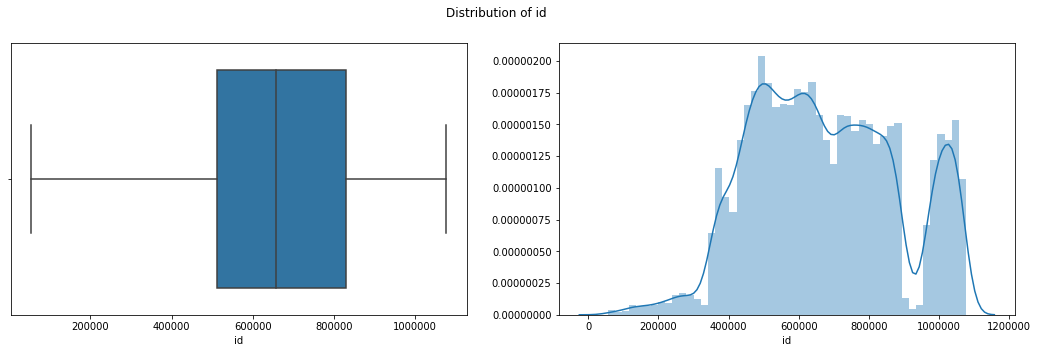

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


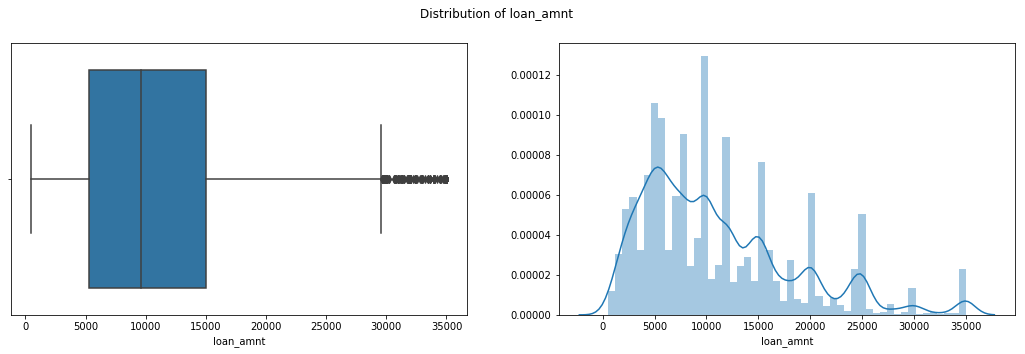

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


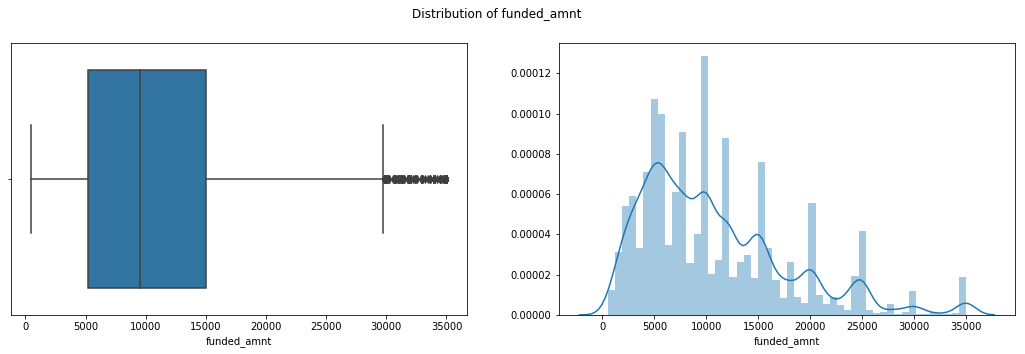

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


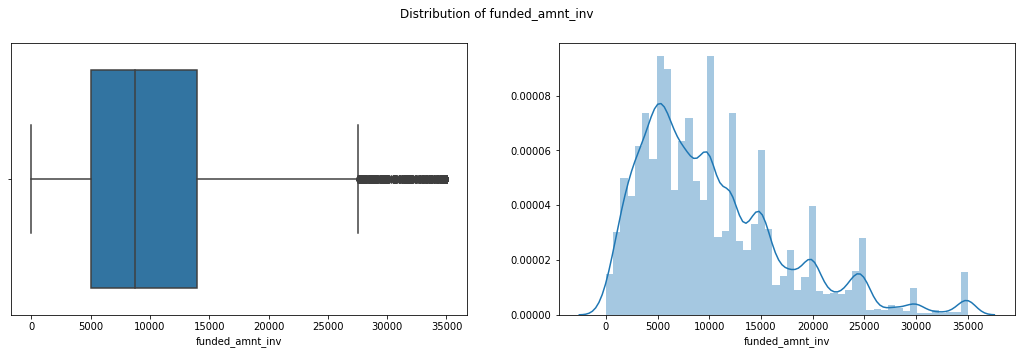

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


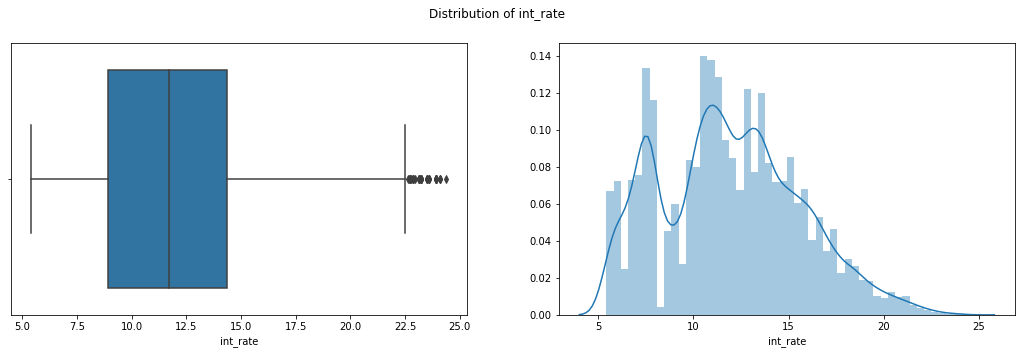

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


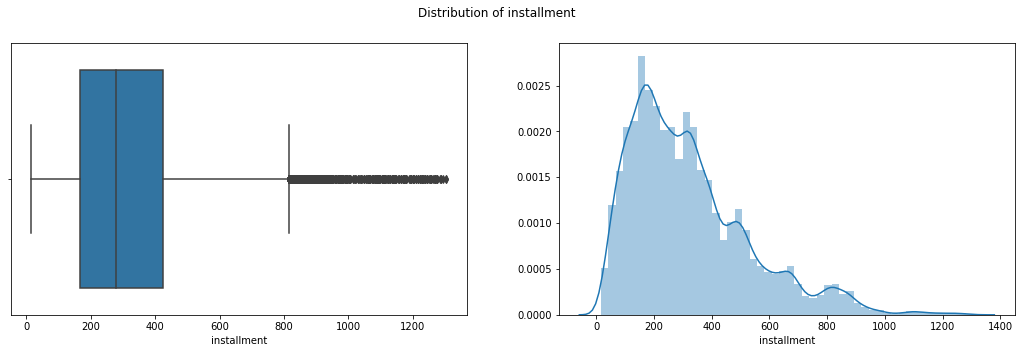

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


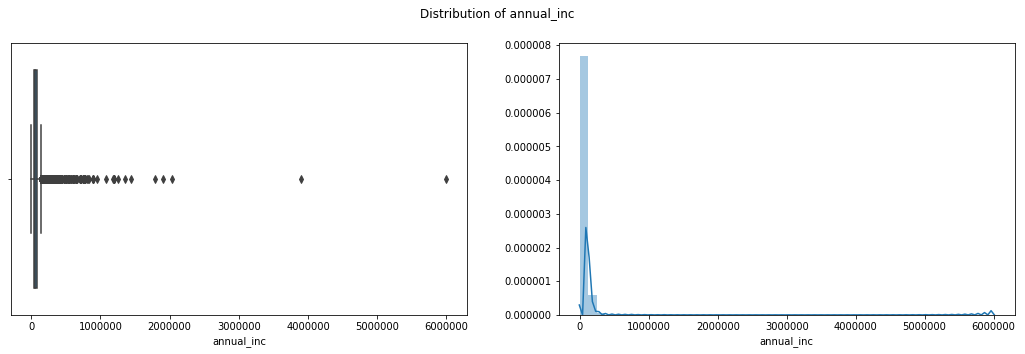

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


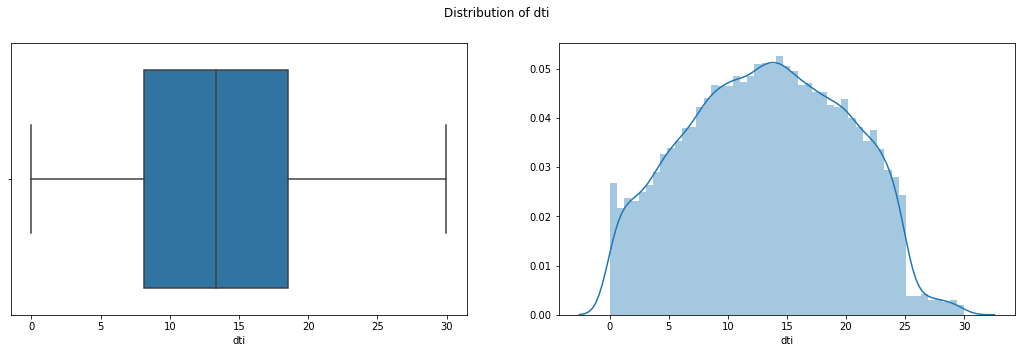

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


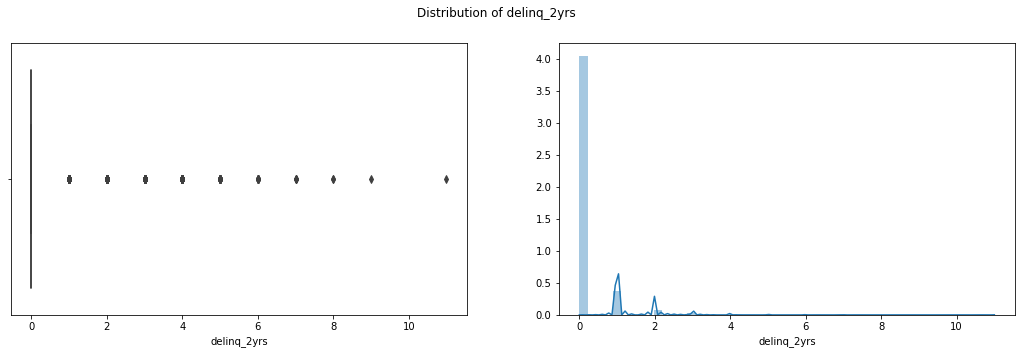

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


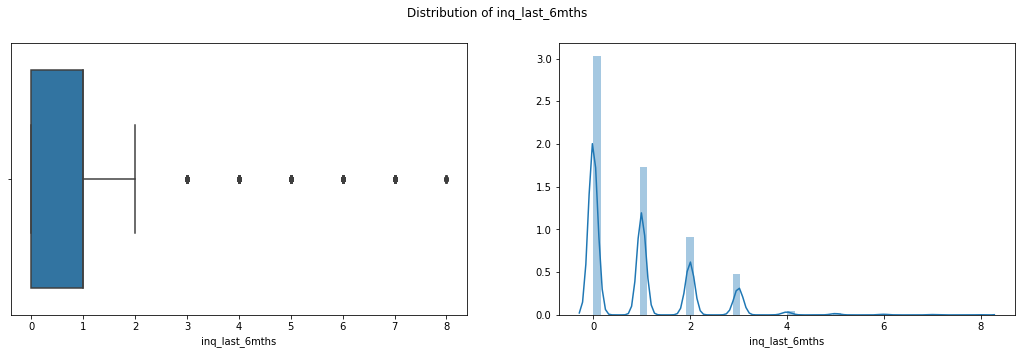

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


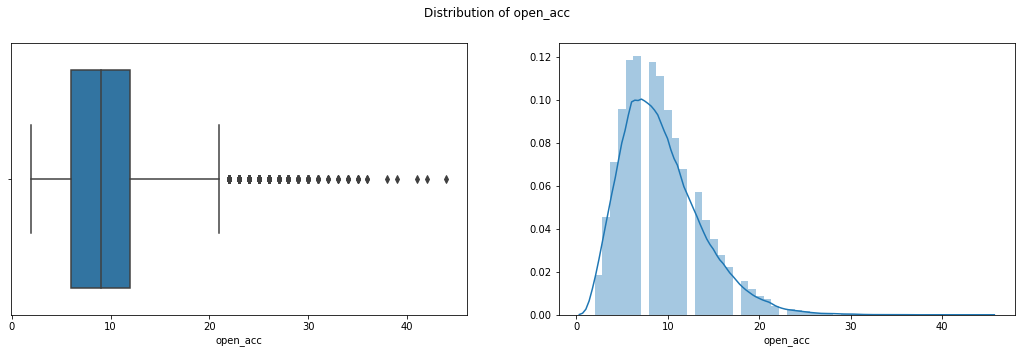

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


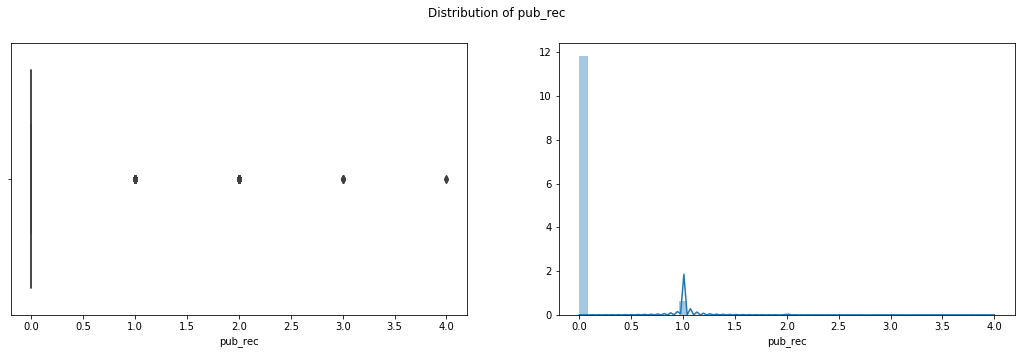

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


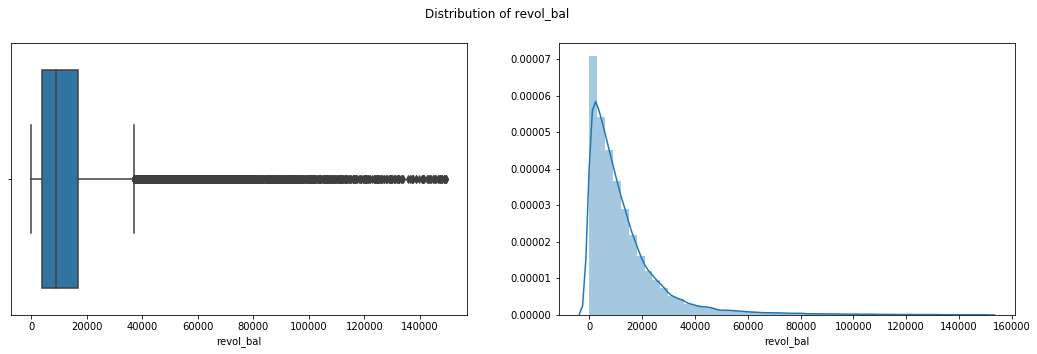

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


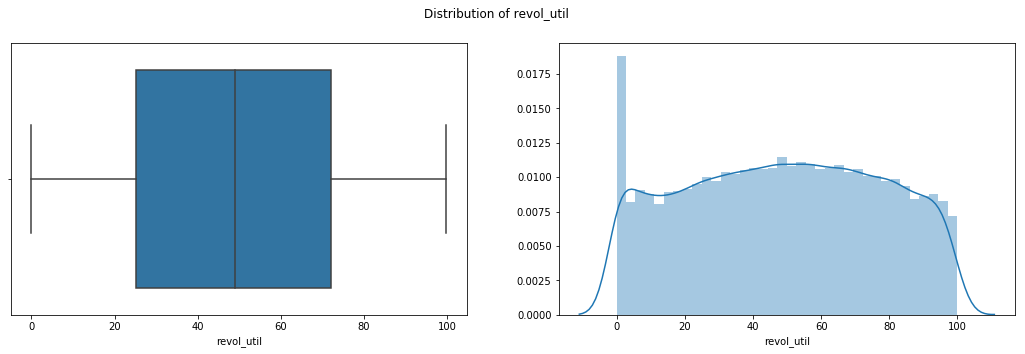

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


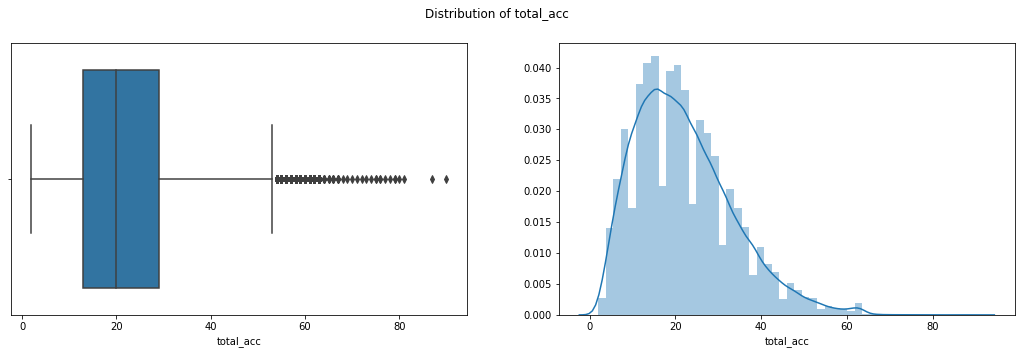

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


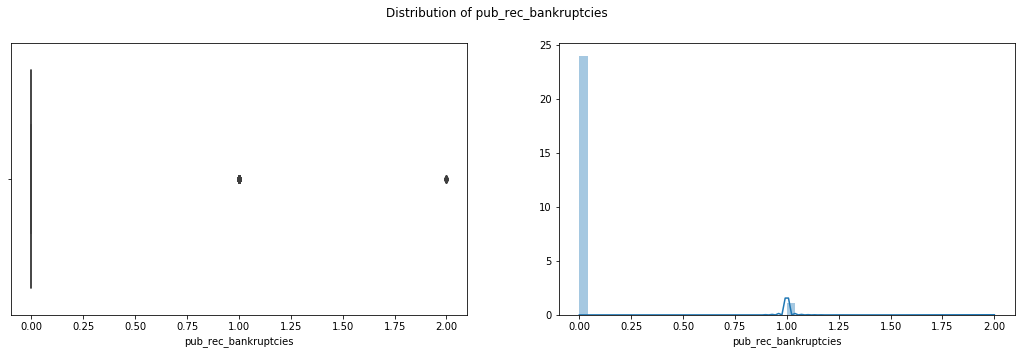

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


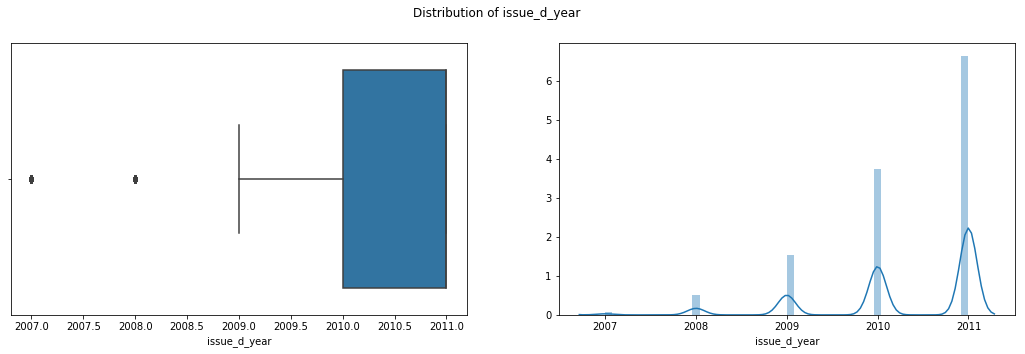

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


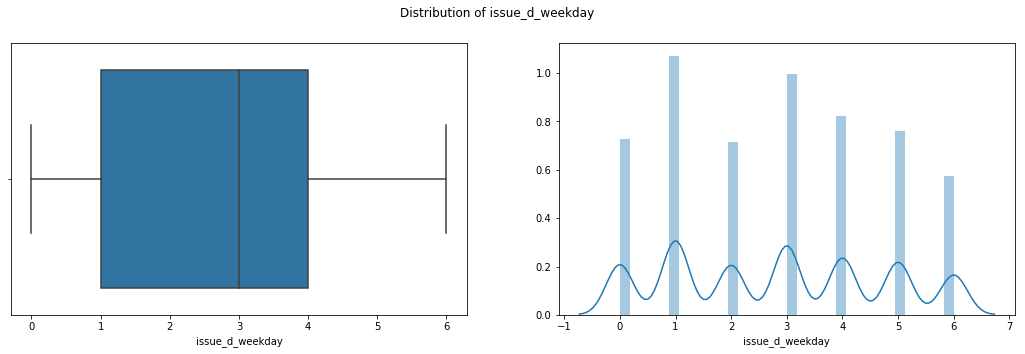

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


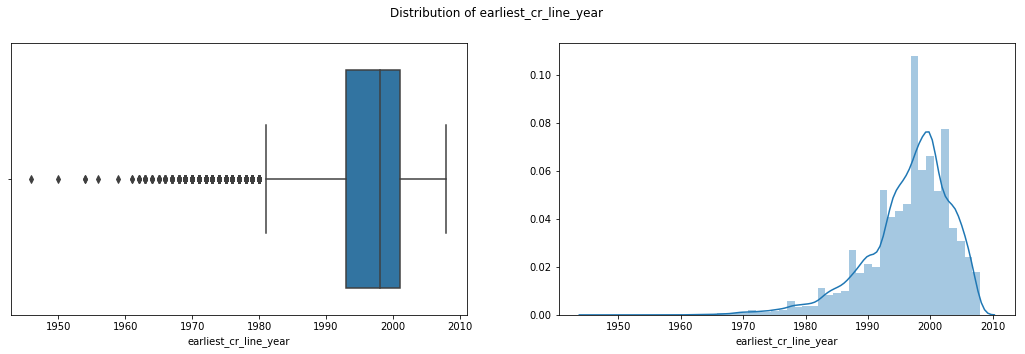

C:\Users\SwarnenduSarkar\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


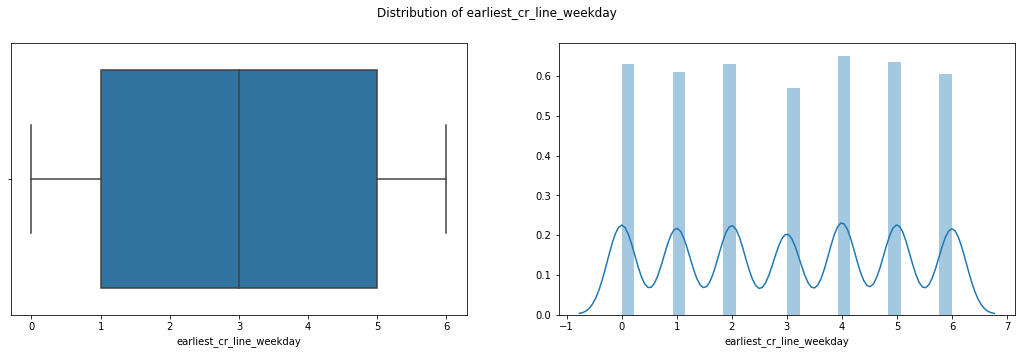

In [52]:
#Boxplots and Distribution plots for numeric variables
num_cols = list(df.select_dtypes(exclude=['object', 'datetime64[ns]' ]).columns)
for var in num_cols:
    #Increasing the figure size of plot
    plt.figure(figsize=(18,5))
    #Setting subplot index
    plt.subplot(1,2,1)
    #Box plot
    sns.boxplot(df[var])
    plt.subplot(1,2,2)
    #Histogram
    sns.distplot(df[var])
    plt.suptitle('Distribution of '+var)
    plt.show()

### 'id'
This is a unique key which can be used a primary key.
### 'loan_amnt'
From the above plots, the median is 10000. And very few people have taken a loan of 30000 or more. The IQR lies between 5000-15000.
### 'funded_amnt'
Behaves similar to 'loan_amnt'. Which means most of the loan applications have been approved.
### 'funded_amnt_inv'
Behave similar to 'loan_amnt'. This means most of the loan applications have been invested upon.
### 'int_rate'
Interest rate for majority of the loans fall between 8 to 15%.
### 'installments'
Number of installments have an IQR around 200-400.
### 'annual_inc'
Annual Income of the applicants have an IQR between 40000 to 82000. Although there are quite a few high incomes which skew the data.
### 'dti'
Looks like there are no outliers and the distribution is very much similar to normal distribution.
This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.
### 'open_acc'
The numer of open credit lines can be a major indicating variable. It has an IQR between 5-12
### 'revol_bal'
IQR between 25-72. Follows a poisson distribution
### 'revol_util'
Follows a normal distribution. Indicates the percentage of credit used out of the available limit.
### 'total_acc'
Follows a basic normal distribution. Total number of current credit lines.


### Below columns will be analyzed further with categorical variables, as they are categorical variables though they have numerical data
'delinq_2yrs','pub_rec','pub_rec_bankruptcies','inq_last_6mths', etc..

## Categorical variables

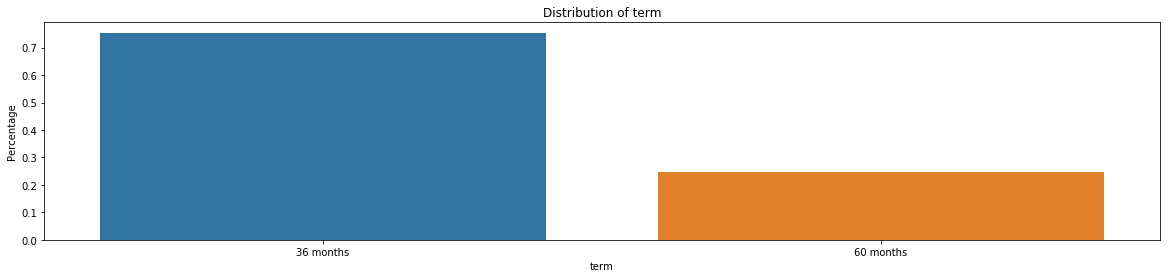

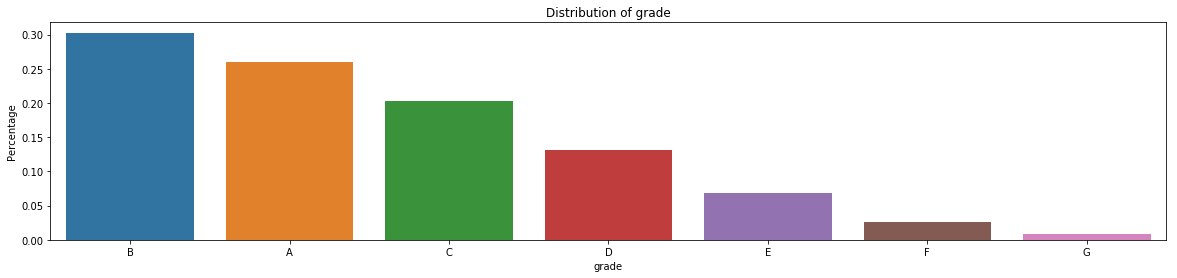

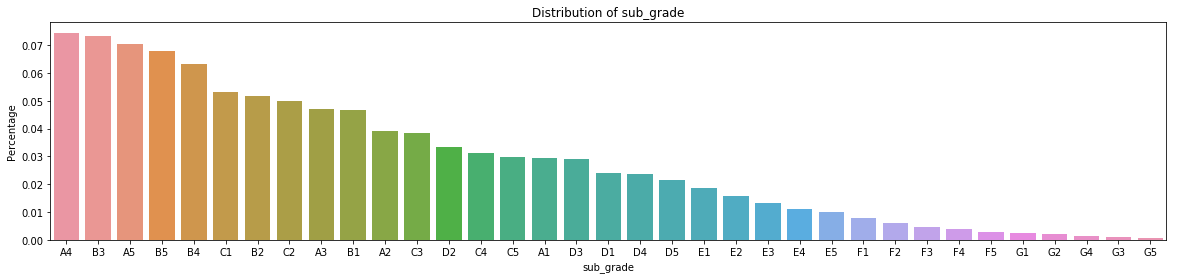

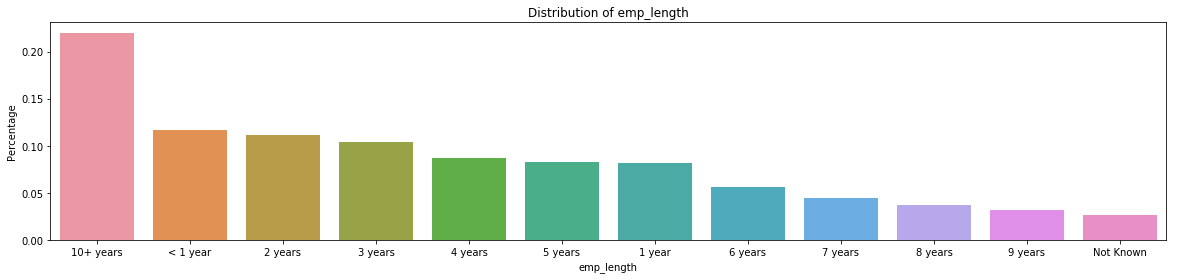

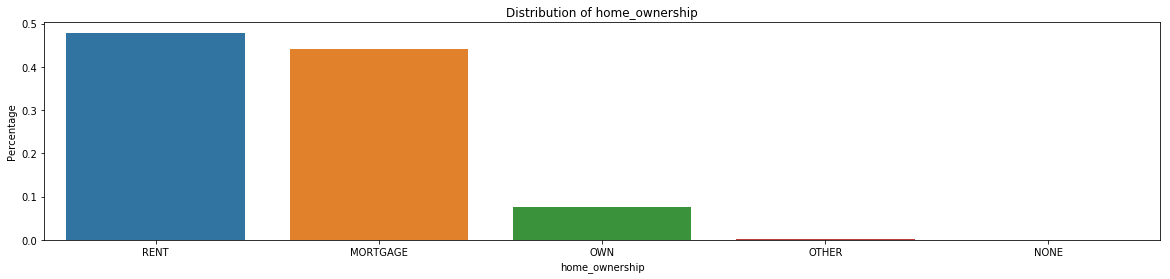

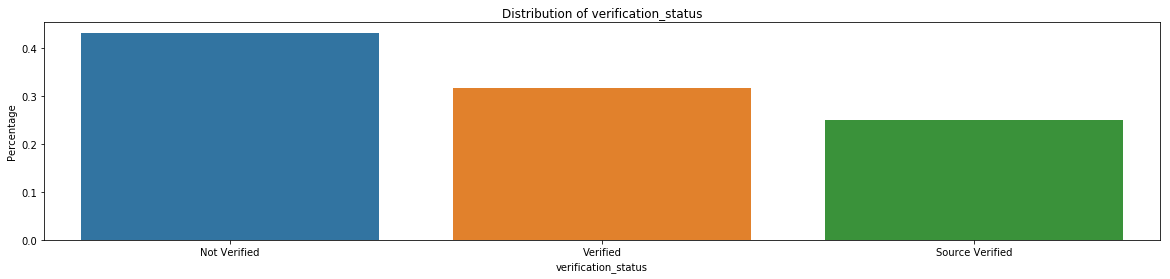

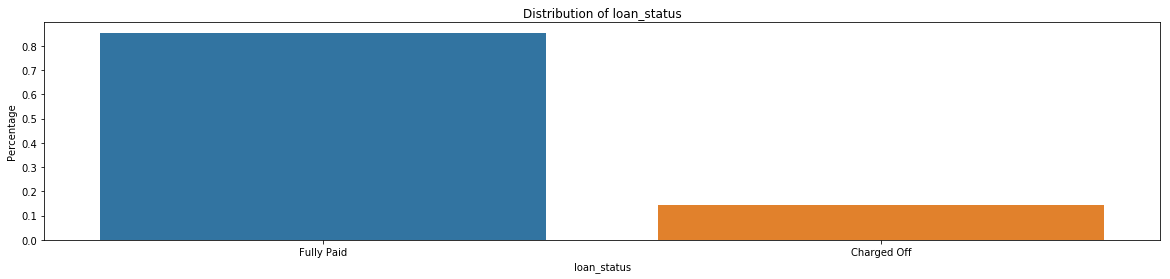

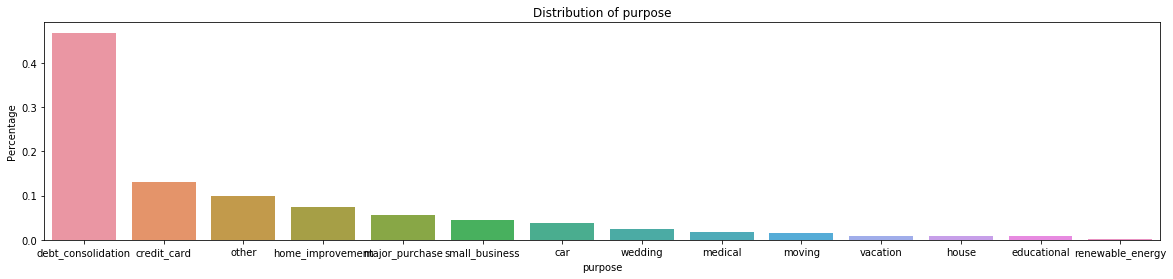

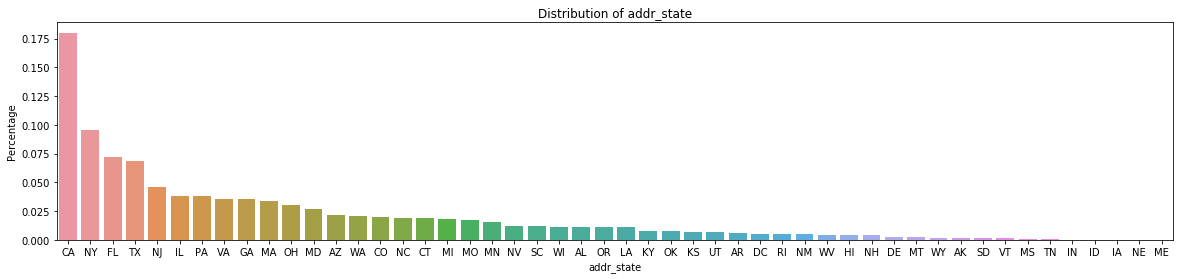

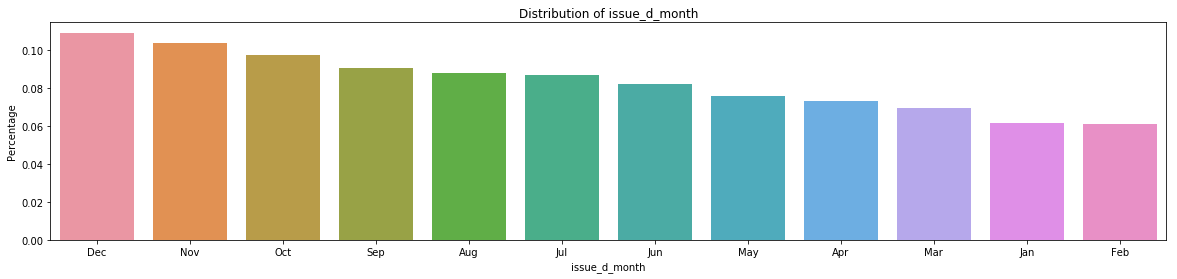

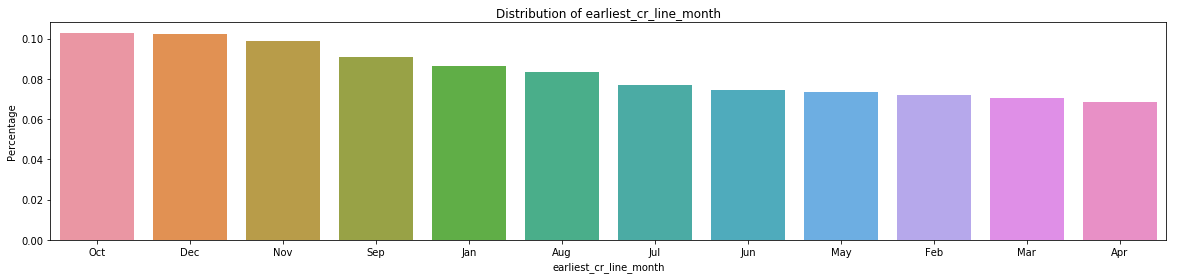

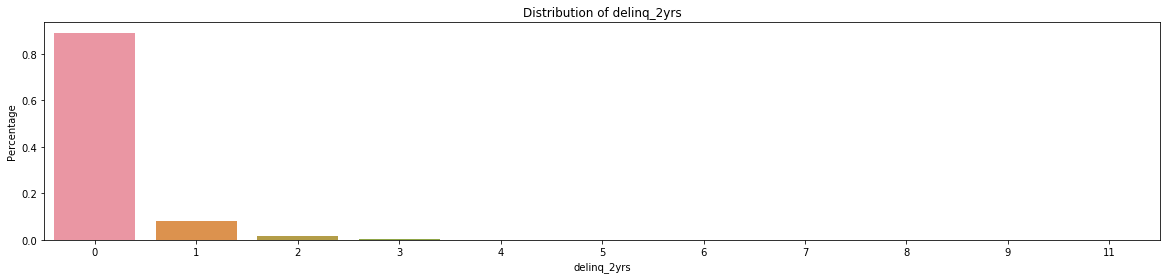

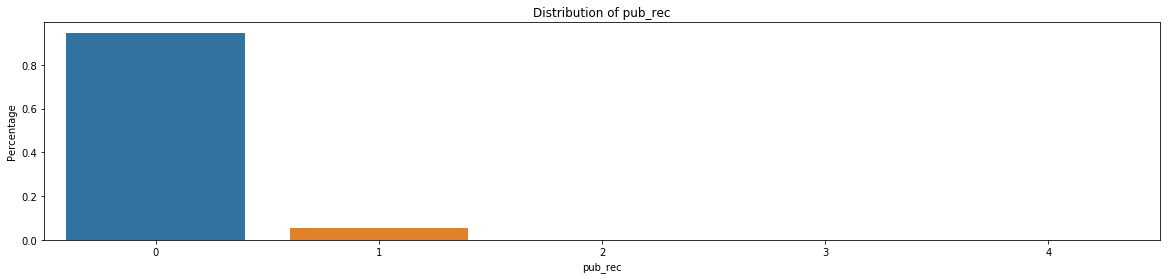

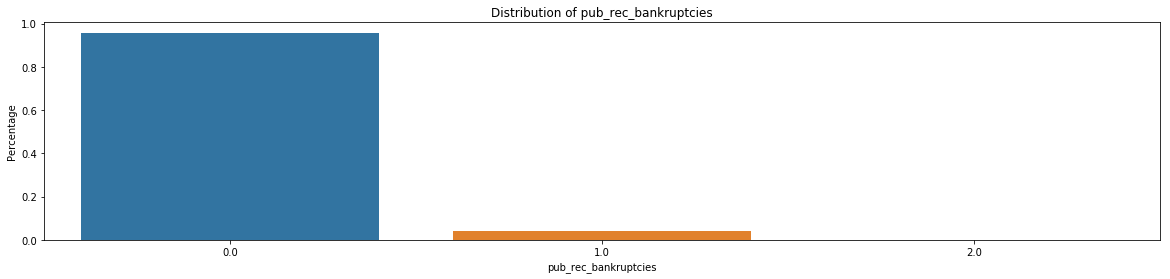

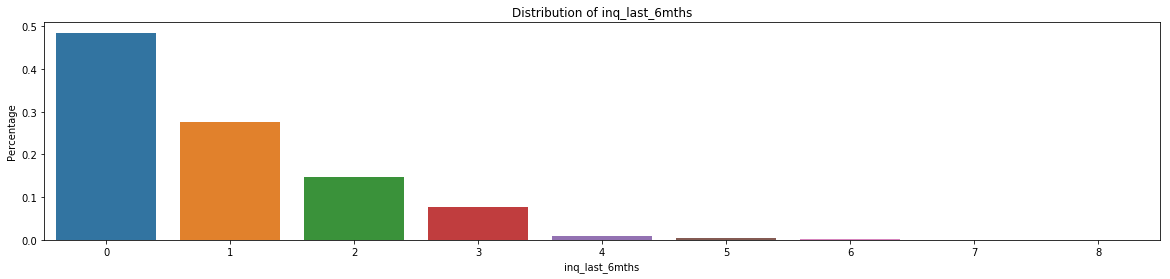

In [53]:
cat_cols = list(df.select_dtypes(include=['object' ]).columns)
cat_cols.extend(['delinq_2yrs','pub_rec','pub_rec_bankruptcies','inq_last_6mths'])
cat_cols.remove('zip_code')
for var in cat_cols:
    plt.figure(figsize=(20,4))
    #Probability / Percentage of each values
    prob_df = df[var].value_counts(normalize=True).reset_index()
    sns.barplot(x='index', y=var, data=prob_df)
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.title('Distribution of '+var)
    plt.show()

### 'pub_rec'
Around 90% borrower's are having no public derogatory records.
### 'pub_rec_bankruptcies'
There is no evidence of bankrupcies in 99% cases.
### 'term'
Tenure of '36' months is more frequent.
### 'grade'
'A' and 'B' account for most of the grades among the appliers.
### 'sub_grade'
'A4', 'B3', 'A5' are the most frequent sub grades.
### 'emp_length'
Applicants having more than 10 years of experience are the majority.
### 'home_ownership'
Applicants mostly have a rented accomodation or have mortgage. Very few people have their own houses.
### 'verification_status'
'Not verified' applicants are majority.
### 'loan_status'
More than 80% loans are paid off.
### 'purpose'
'Debt consolidation' and 'credit_card' account for the major reasons behind the application.
### 'addr_state'
Most of the applicants are from 'CA' and 'NY'


## Date Variables

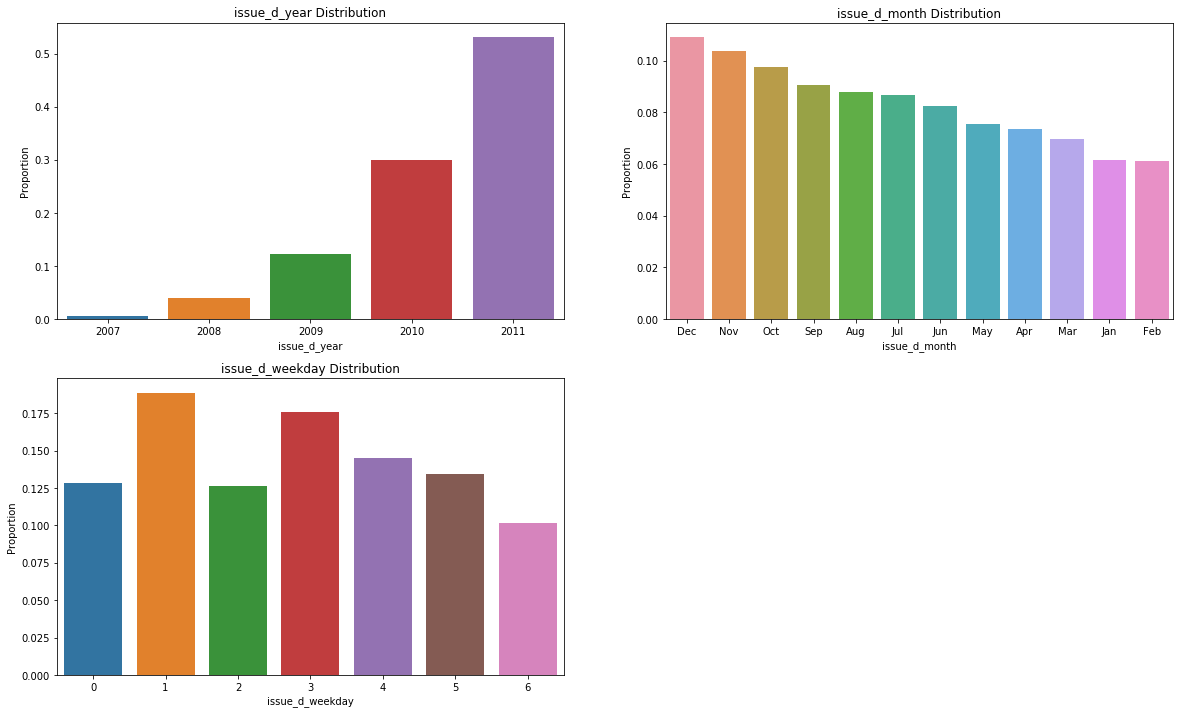

In [54]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

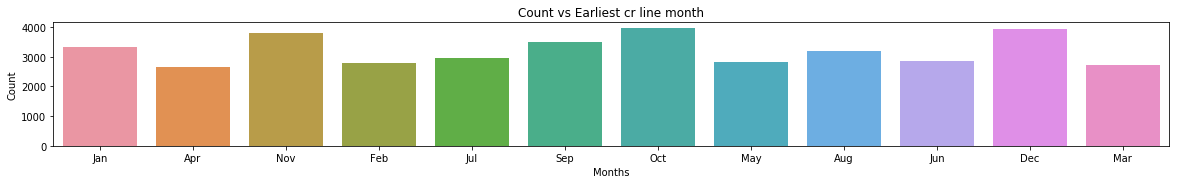

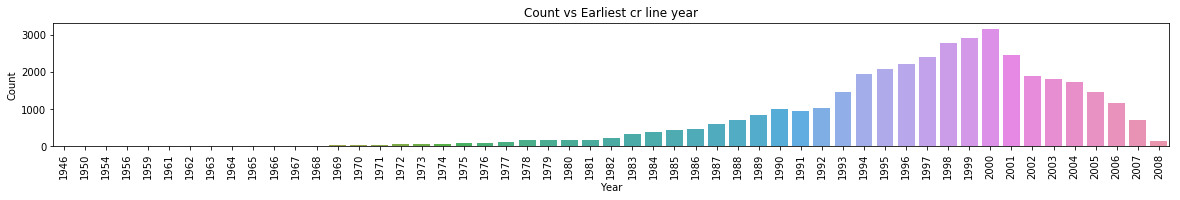

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(df.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(df.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### 'issue_d'
The count of issued loans are increasing rapidly every year.
There is an increasing trend of loan issue as each year progresses. Oct, Nov, Dec account for the higher loan issue months.
There is a high inclination of loan getting issued on Tuesday and Thursday.
### 'earliest_cr_line'
Most of the applicants have an earlest credit line in 2000.

# Segmented Univariate Analysis
This will be done for 'loan_amnt', 'int_rate','dti','annual_inc'

###  Observations on 'loan_amnt'
##### High loant amount have higher loan tenures(60 months).
##### Grade 'F' and 'G' have higher loan amounts. It is safe to say the loan amount is positively corelated with Grade.
##### Applicants having mortgage are given higher amount of loans.
##### 5000-10000 amounted loans are provided across all segments. There is higher inclination towards 'Verified' applicants once the   loan amount crosses 10000.
##### Defaulted loans have a slight inclination towards higher loan amount. But, not so significant.
##### 'Small Business' tops the chart in retreiving high amounted loans.
##### 10+ years experinced employees have higher amounted loans.
##### There was a dip in loan amount in 2008, which makes sense as it was the yearof recession. Apart from that more or less the spread across years is even. December tends to be a month with high loans provided.

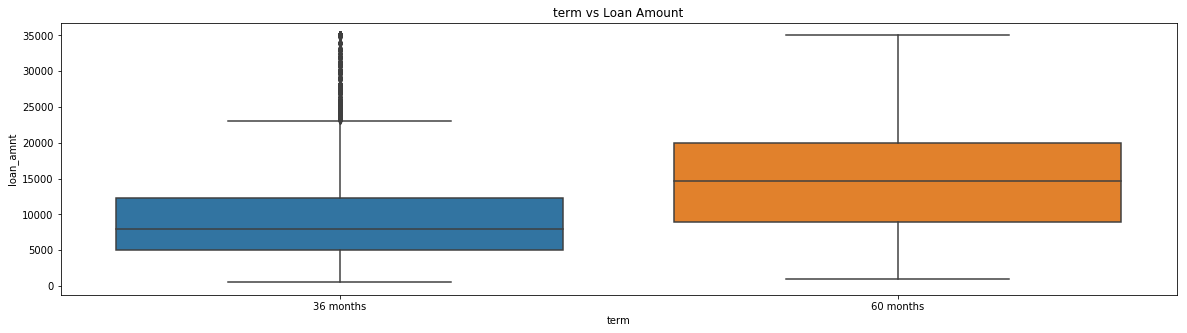

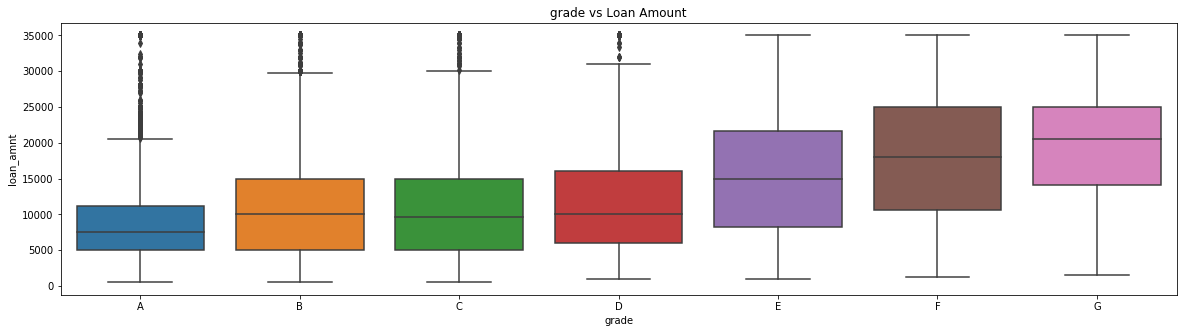

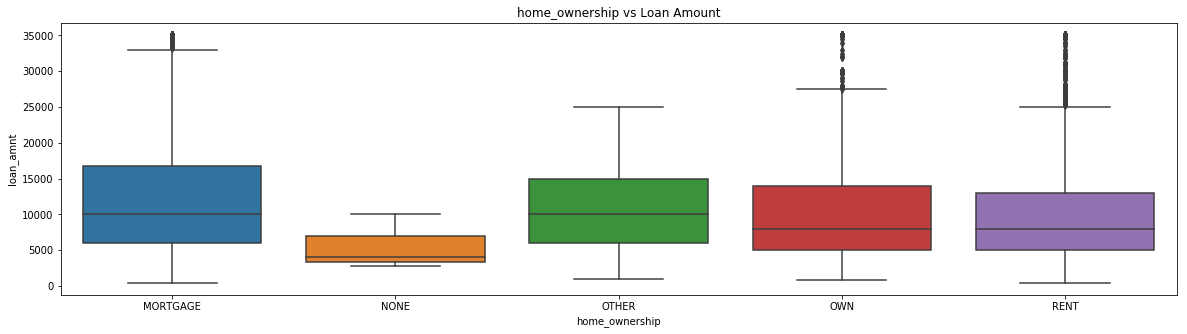

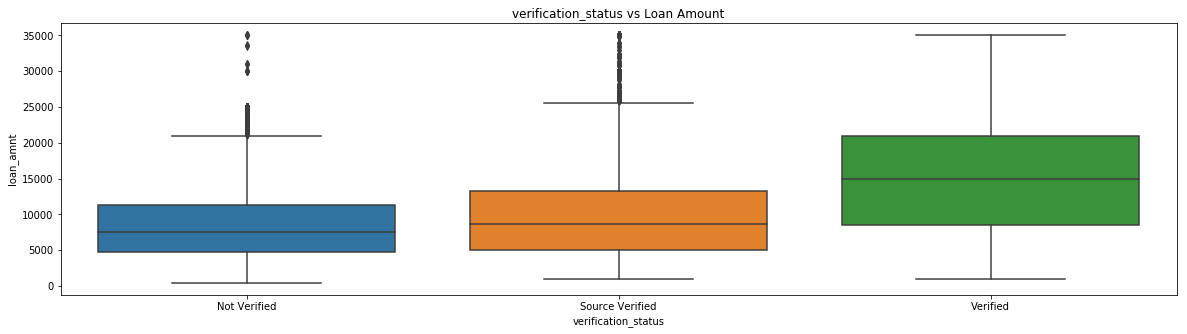

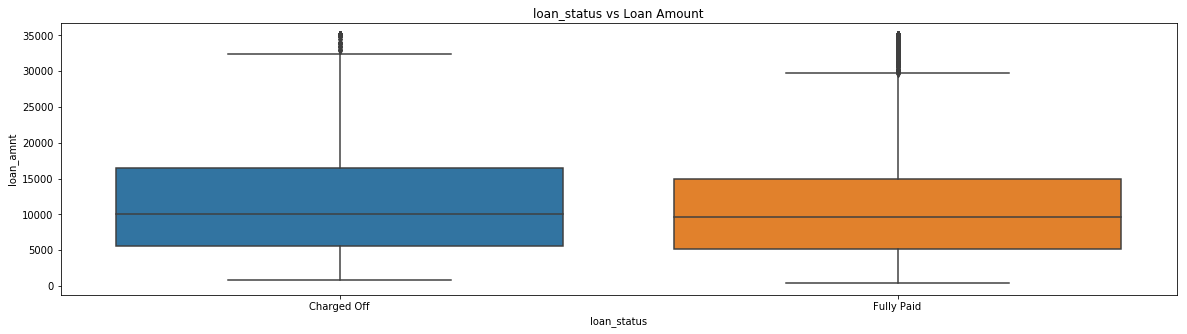

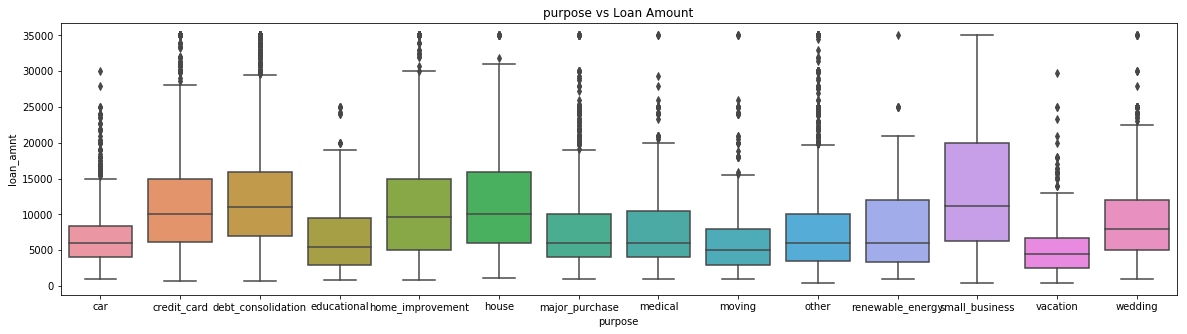

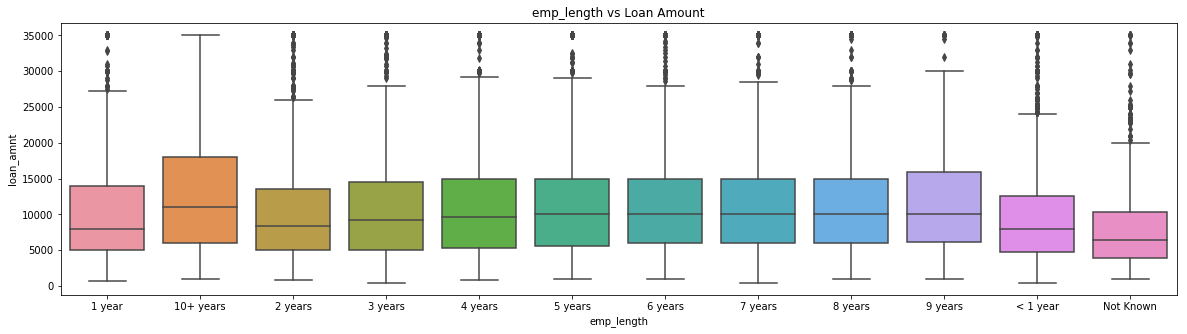

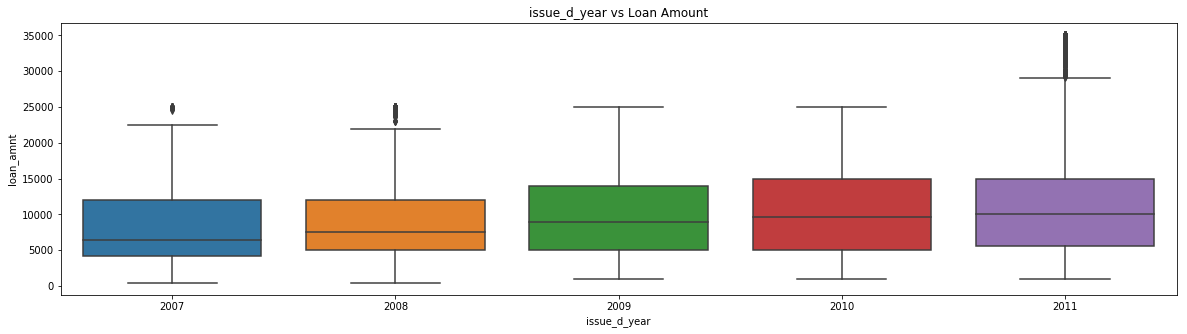

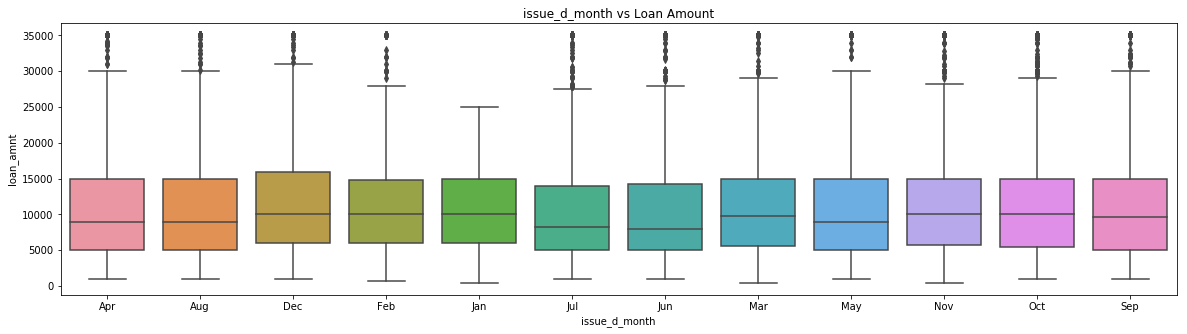

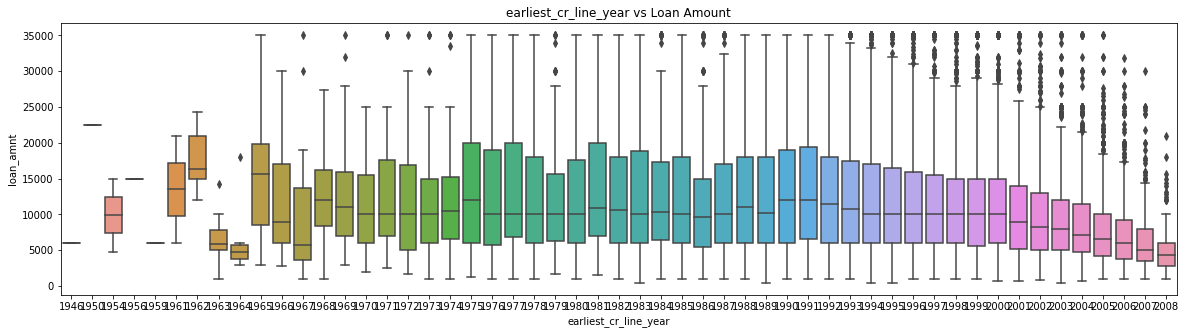

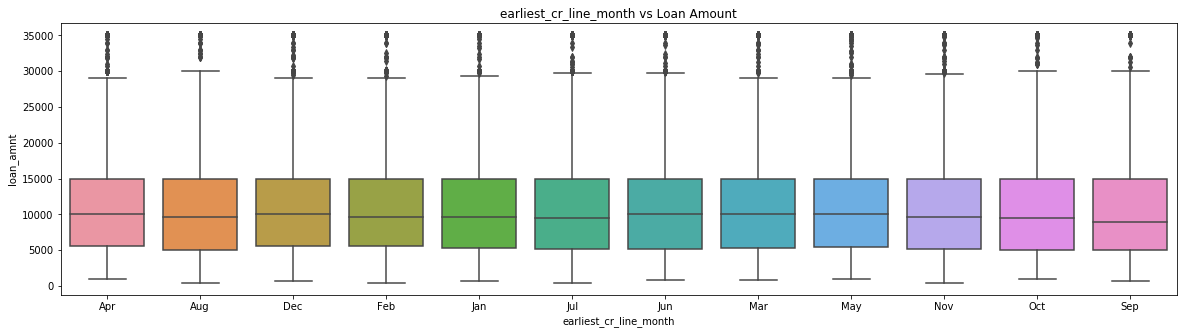

In [68]:
segment_cols = ['term','grade','home_ownership','verification_status','loan_status','purpose','emp_length','issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month']
for var in segment_cols:
    plt.figure(figsize=(20,5))
    plt.title(var+' vs Loan Amount')
    grade_ord = df[var].unique()
    grade_ord.sort()
    sns.boxplot(x=df[var], y=df.loan_amnt, order = grade_ord, data=df)
    plt.show()

### Observations on 'int_rate'
##### Higher interest rates demanded for higher loan tenures(60 months).
##### As the grades go from 'A' to 'G', interest rates increase.
##### Applicants having mortgage are given loans with lower interest rates, because of the security.
##### The verified applicants are charged higher interest rates.
##### Higher interest rated loans default more compared to lower ones.
##### 'Small Business' tops the chart in higher interest rates.
##### Employment length isn't a factor towards interest rate.
##### Interest rate has diversified over the years. Nothing stands out.

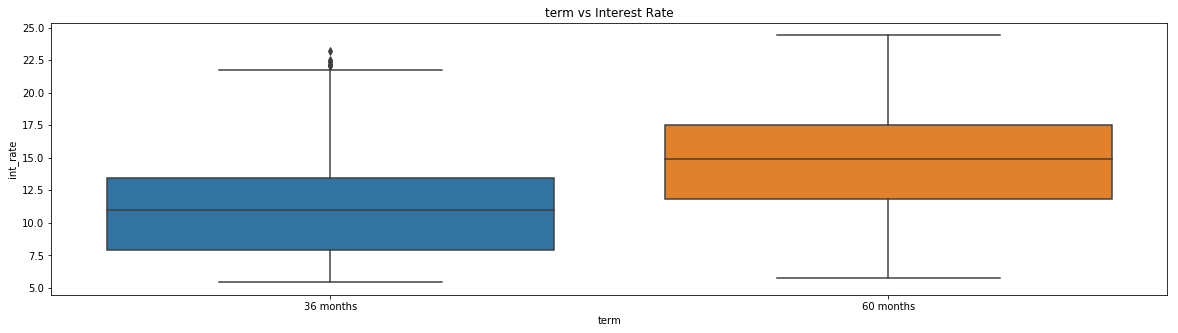

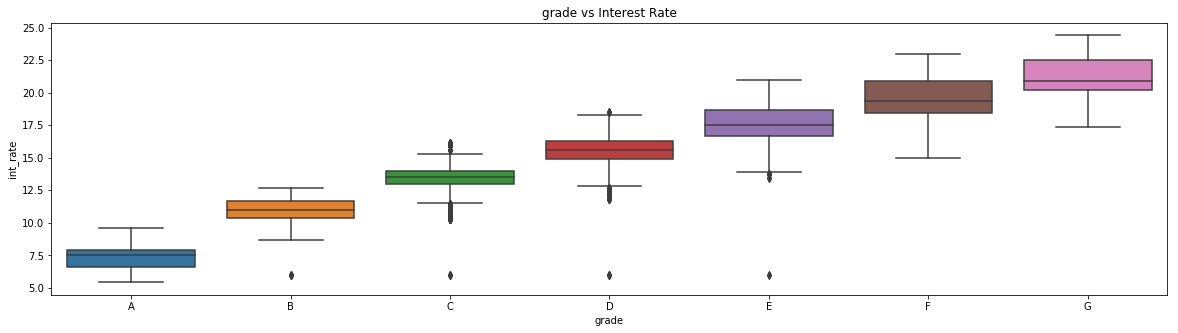

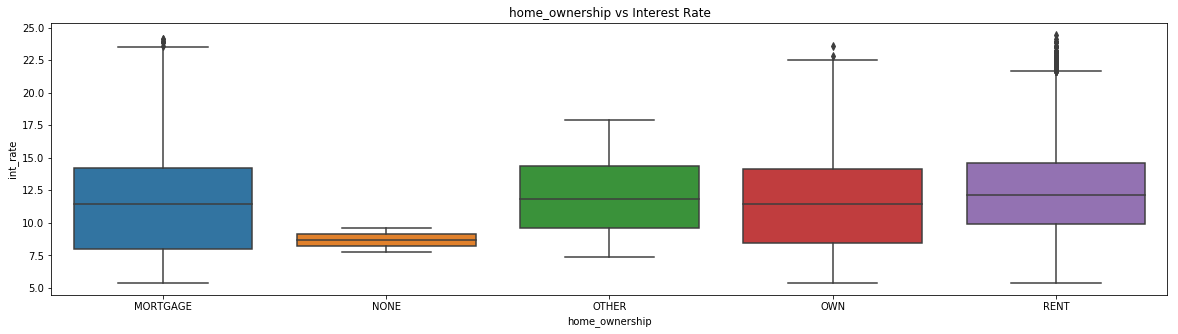

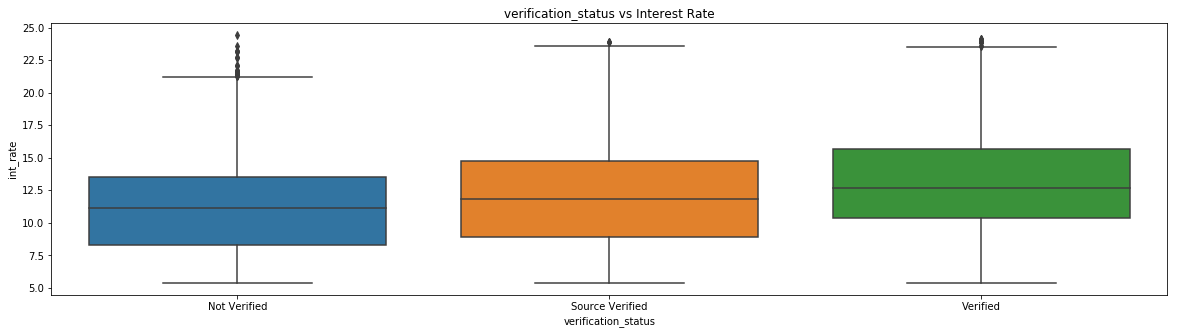

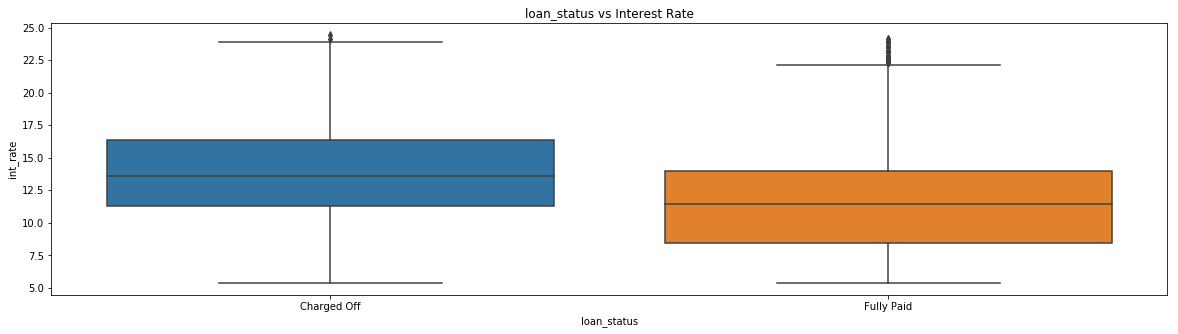

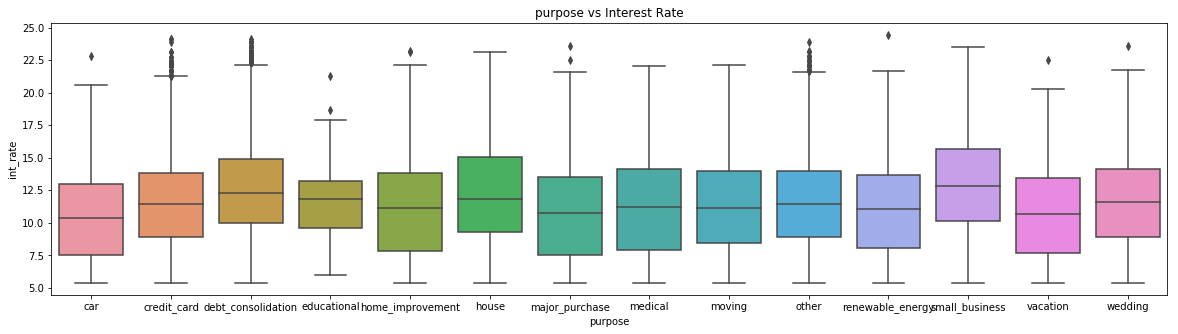

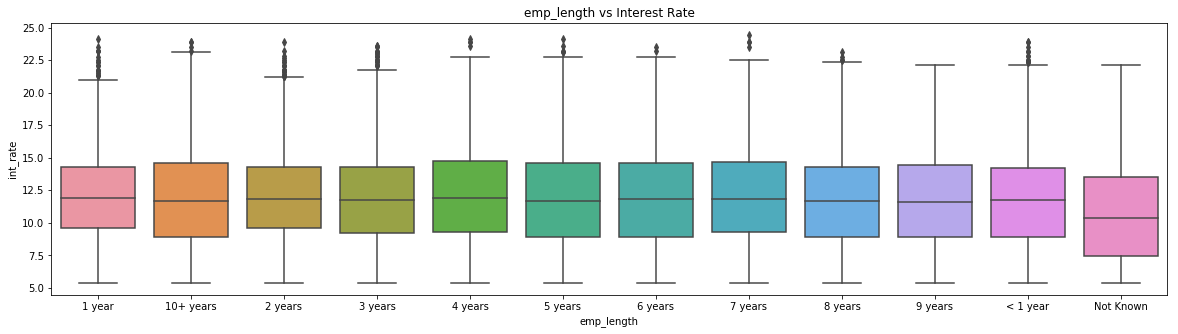

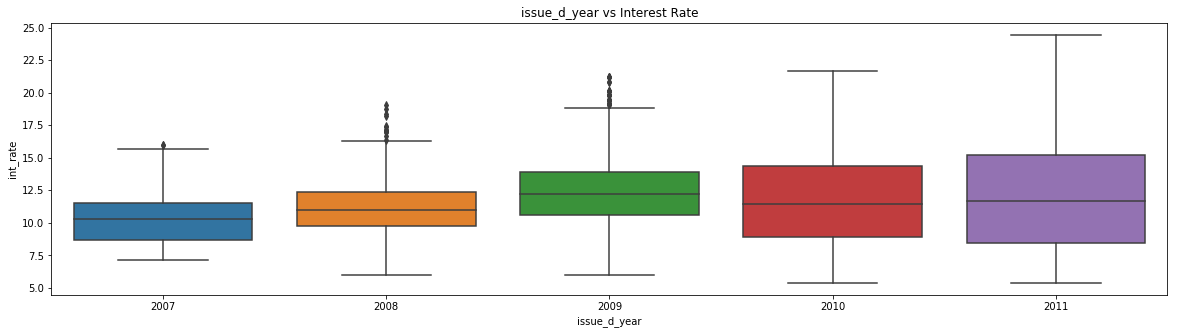

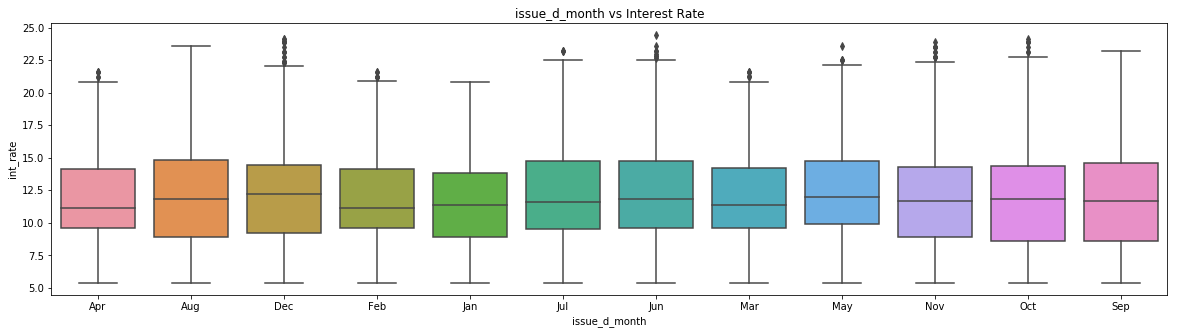

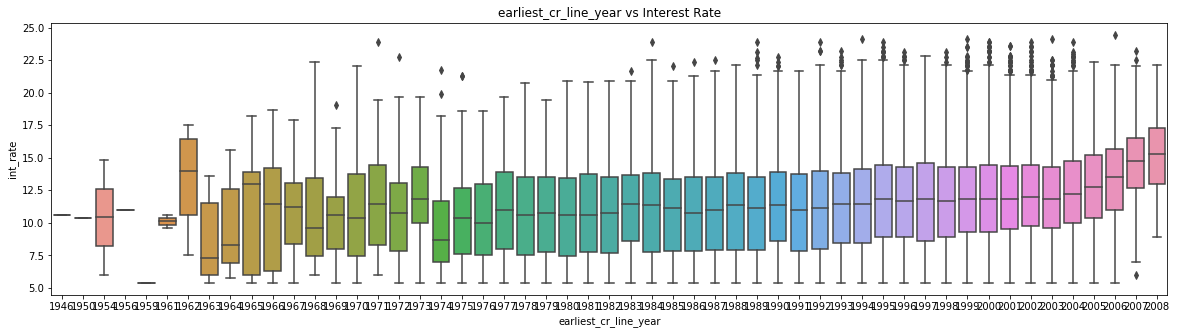

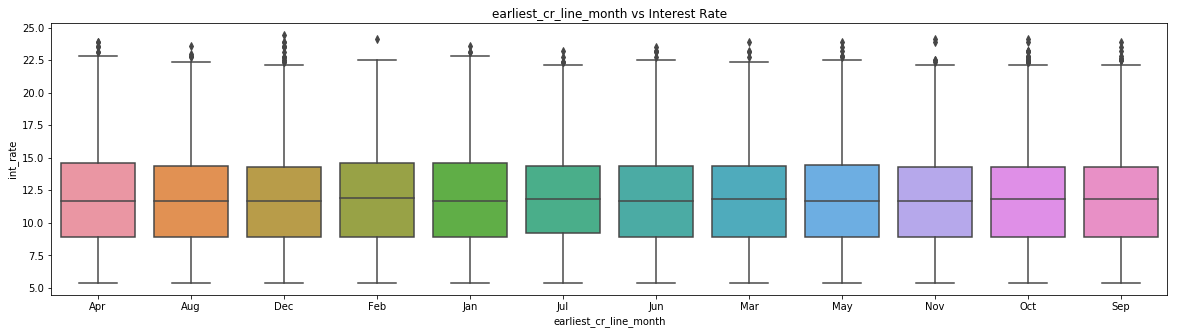

In [64]:
segment_cols = ['term','grade','home_ownership','verification_status','loan_status','purpose','emp_length','issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month']
for var in segment_cols:
    plt.figure(figsize=(20,5))
    plt.title(var+' vs Interest Rate')
    grade_ord = df[var].unique()
    grade_ord.sort()
    sns.boxplot(x=df[var], y=df.int_rate, order = grade_ord, data=df)
    plt.show()

### Observations on 'dti'
##### There is no major difference in DTI between tenures.
##### Grade 'A' applicants have less DTI compared to others, which means their payment towards loan is more.
##### 'Other' category has less DTI, which make sense, as there is evidence on what sort of home they have.
##### Applicants with high DTI default more.
##### 'Applicants who have taken loan for 'Credit Card' and 'Debt Consolidation' have higher DTI.
##### Employment length isn't a factor towards DTI

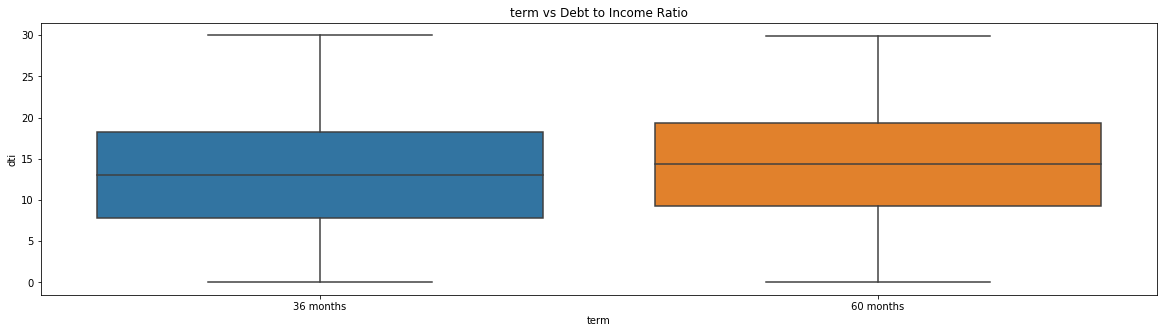

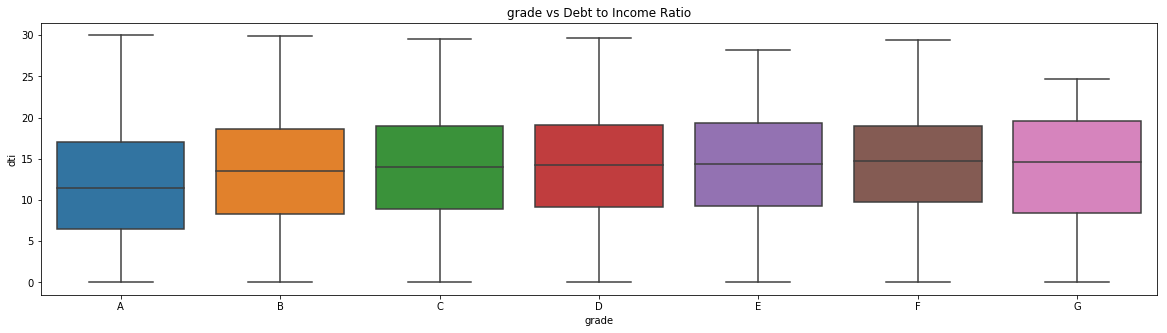

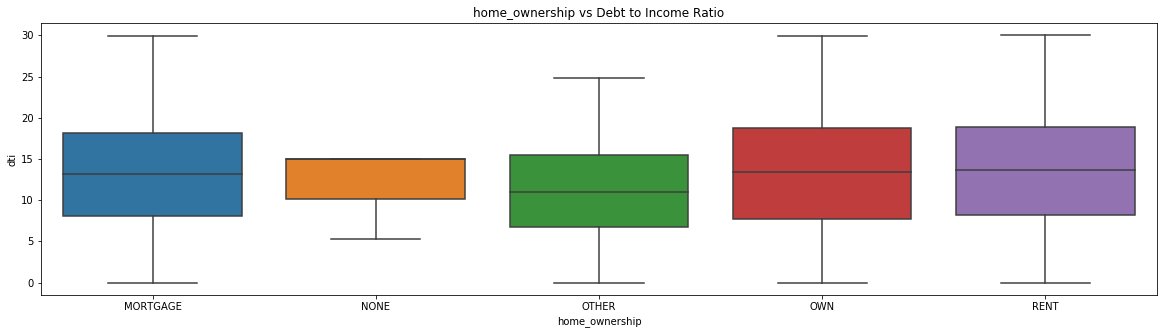

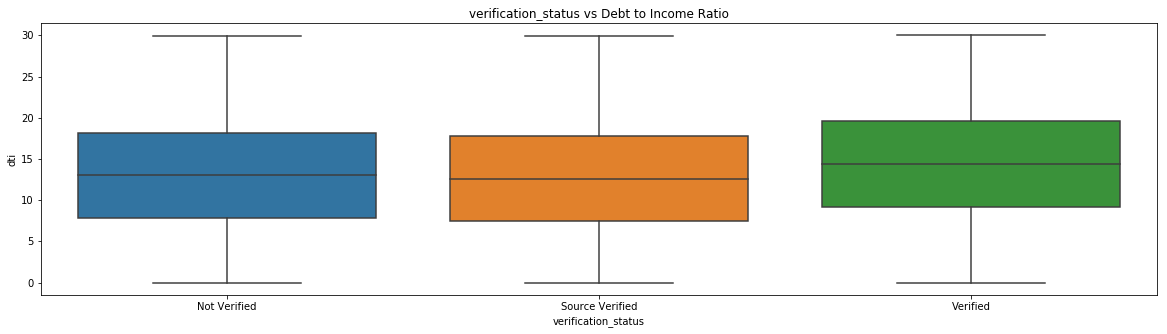

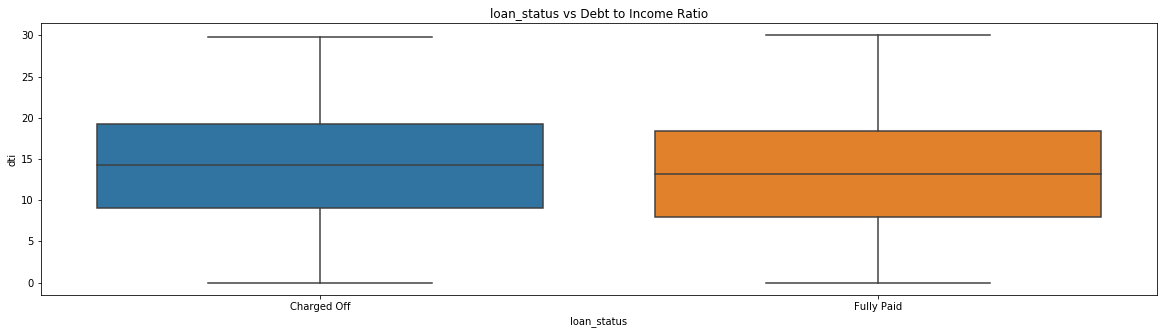

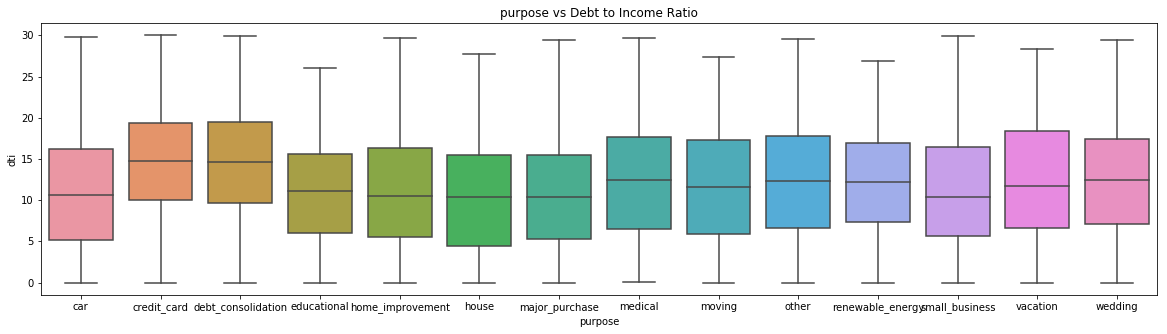

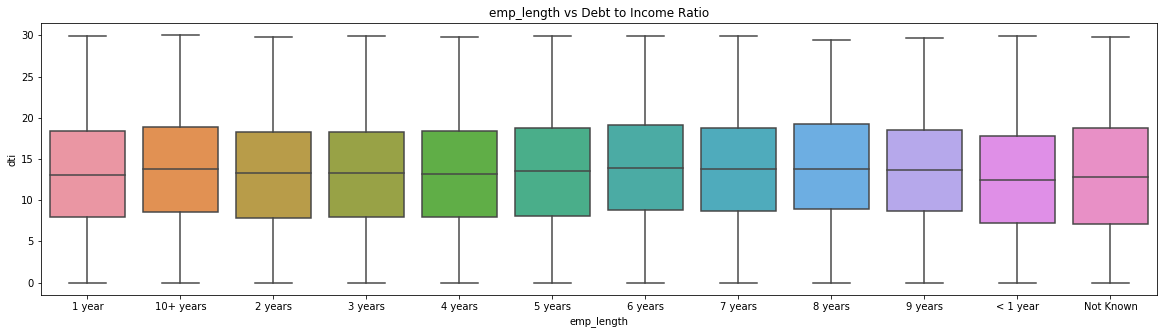

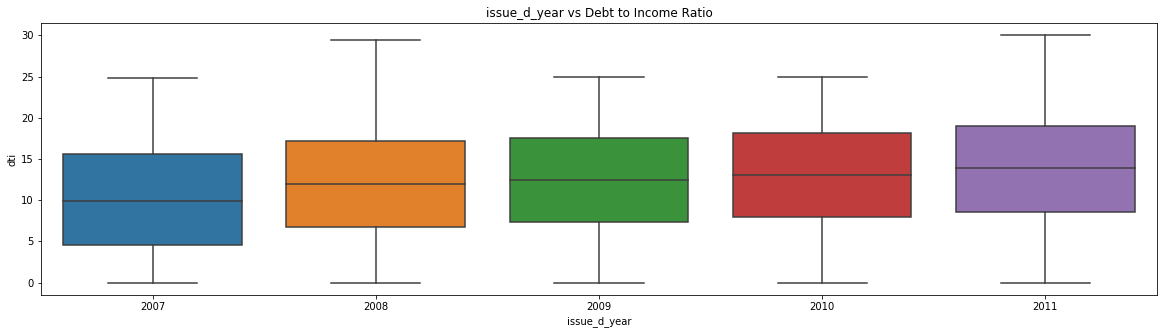

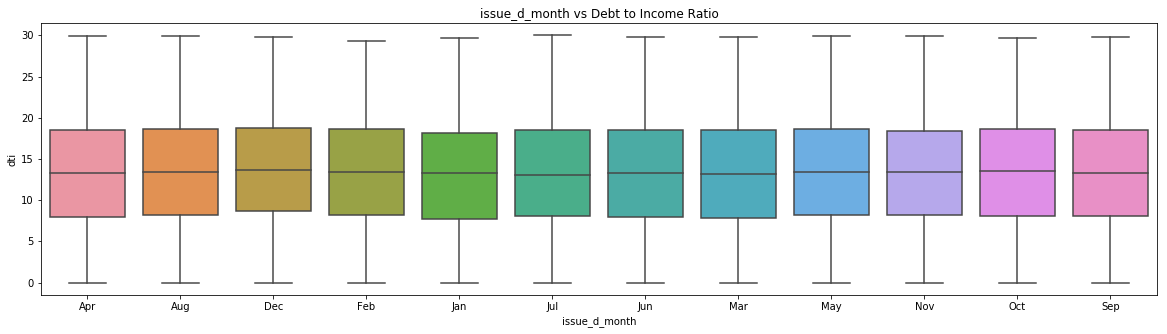

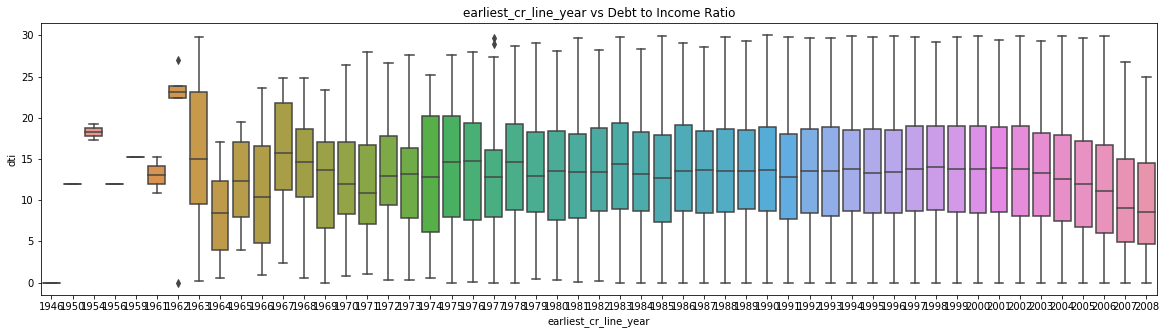

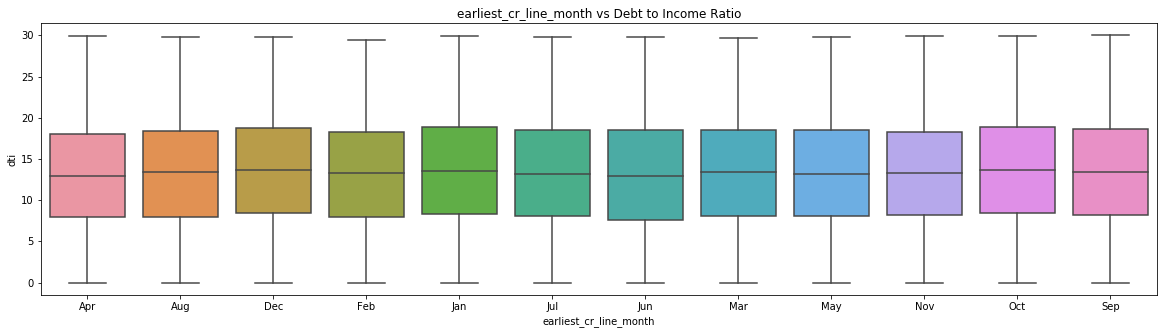

In [65]:
segment_cols = ['term','grade','home_ownership','verification_status','loan_status','purpose','emp_length','issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month']
for var in segment_cols:
    plt.figure(figsize=(20,5))
    plt.title(var+' vs Debt to Income Ratio')
    grade_ord = df[var].unique()
    grade_ord.sort()
    sns.boxplot(x=df[var], y=df.dti, order = grade_ord, data=df)
    plt.show()

### Observations on 'annual_inc'
##### There is no major difference in terms of tenure.
##### There is no major difference in terms of grade.
##### Applicants having mortgage have higher annual income.
##### The verified applicants have higher annual income.
##### Applicant having higher income default less.
##### 'Small Business' ,'Renewable Energy','Home Improvement'  are the reasons where applicants have higher income.
##### Applicant having more than 10 years employment definitely earn more.
##### Annual Income has diversified over the years. Nothing stands out.

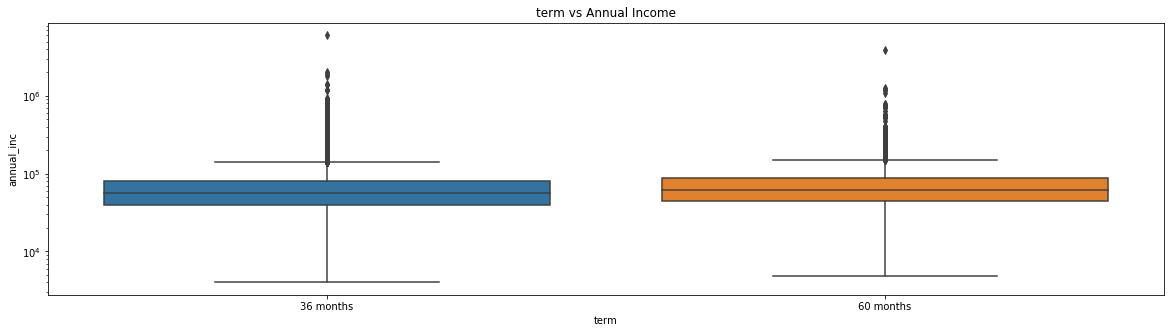

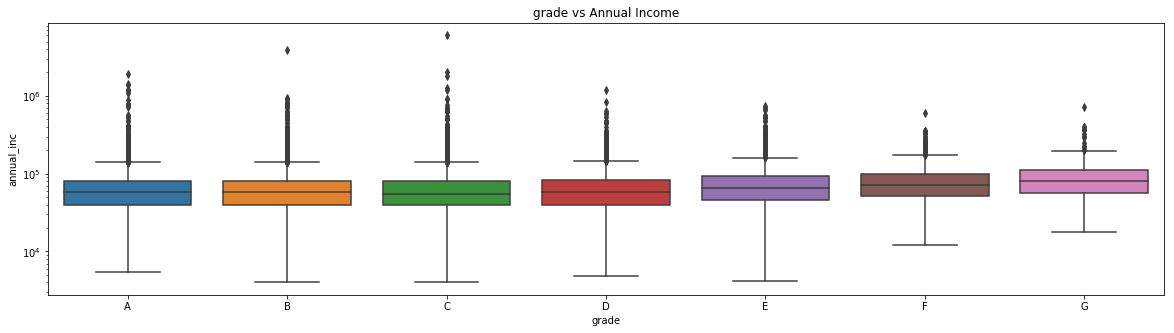

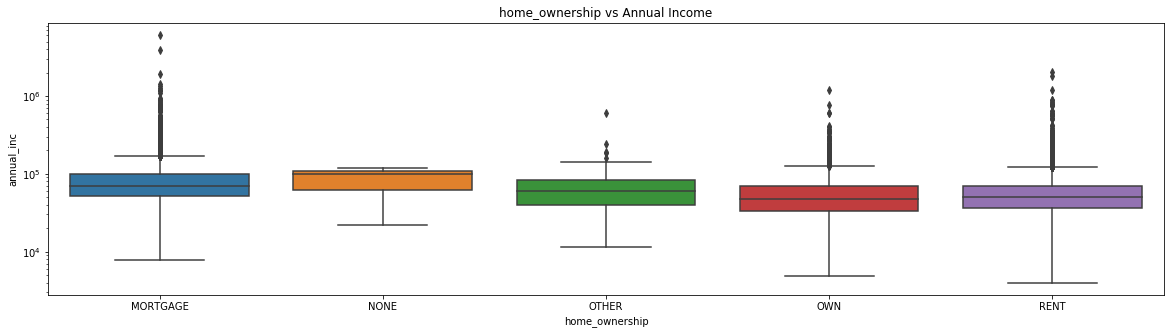

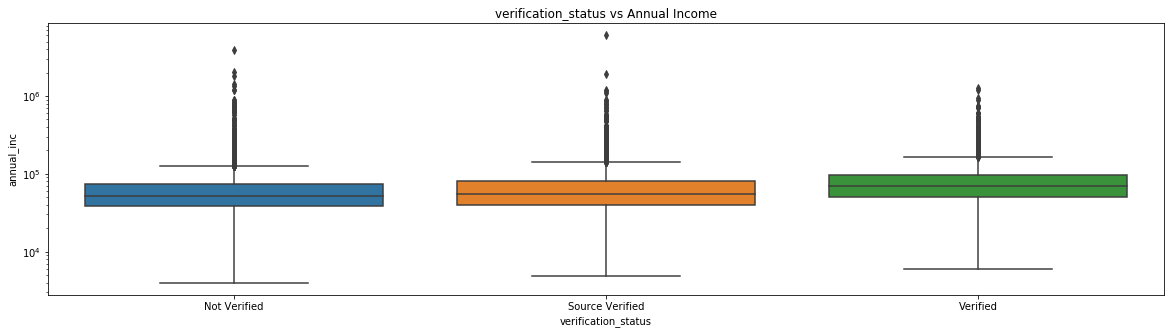

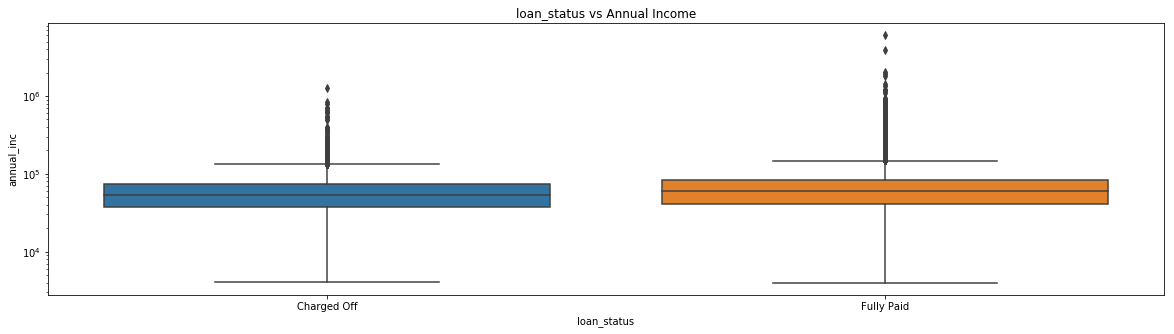

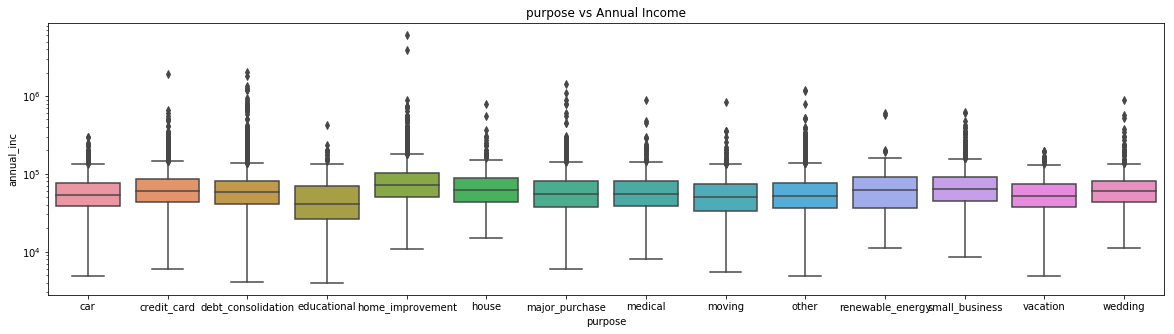

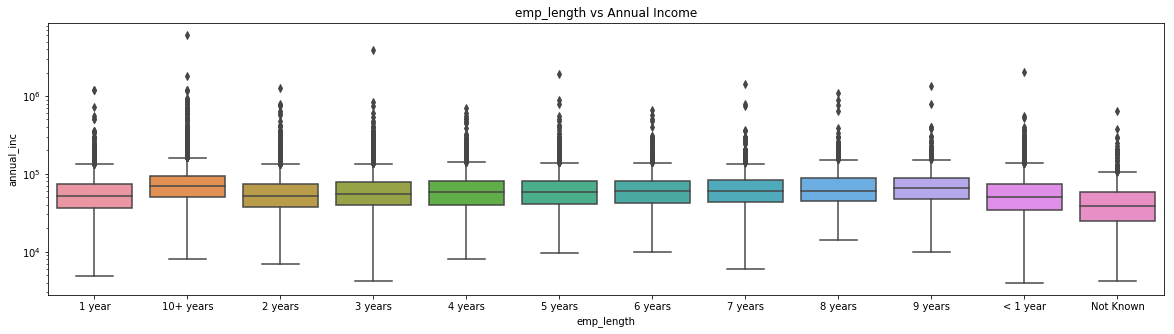

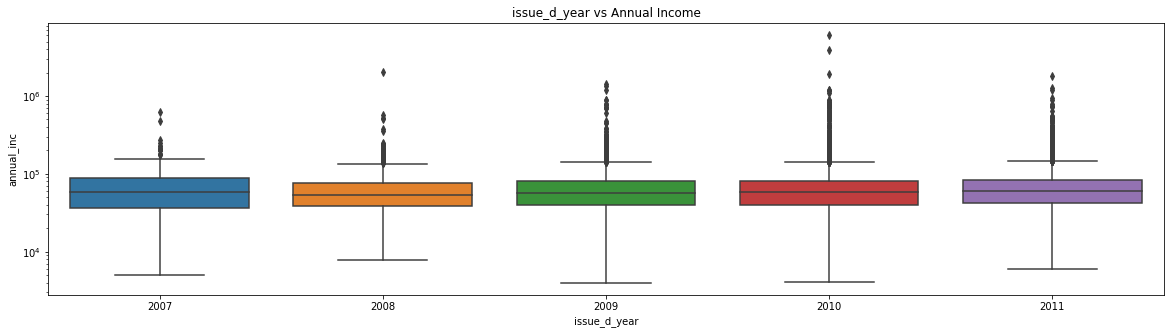

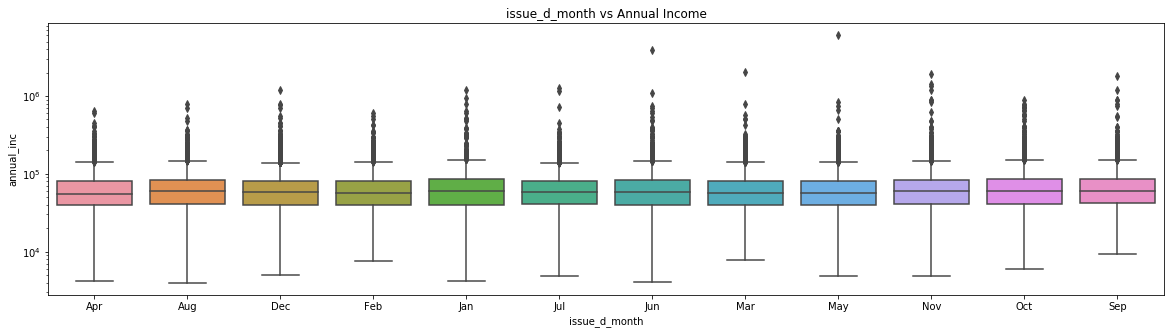

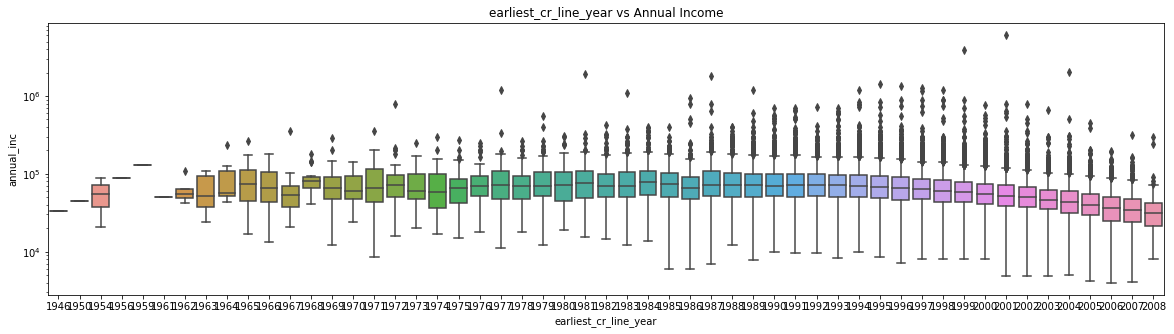

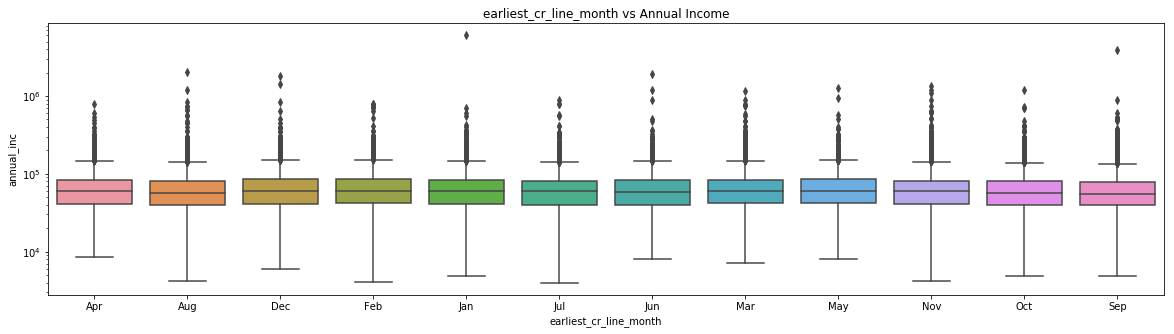

In [66]:
segment_cols = ['term','grade','home_ownership','verification_status','loan_status','purpose','emp_length','issue_d_year','issue_d_month','earliest_cr_line_year','earliest_cr_line_month']
for var in segment_cols:
    plt.figure(figsize=(20,5))
    plt.title(var+' vs Annual Income')
    grade_ord = df[var].unique()
    grade_ord.sort()
    sns.boxplot(x=df[var], y=df.annual_inc, order = grade_ord, data=df)
    plt.yscale('log')

# Bivariate Analysis
Bivariate Analysis will be done against 'loan_status' as that is our target variable with the below variables.
['term','grade','home_ownership','verification_status','purpose','emp_length','addr_state']. This will be analyzed along with 'loan_amnt','dti','int_rate'.

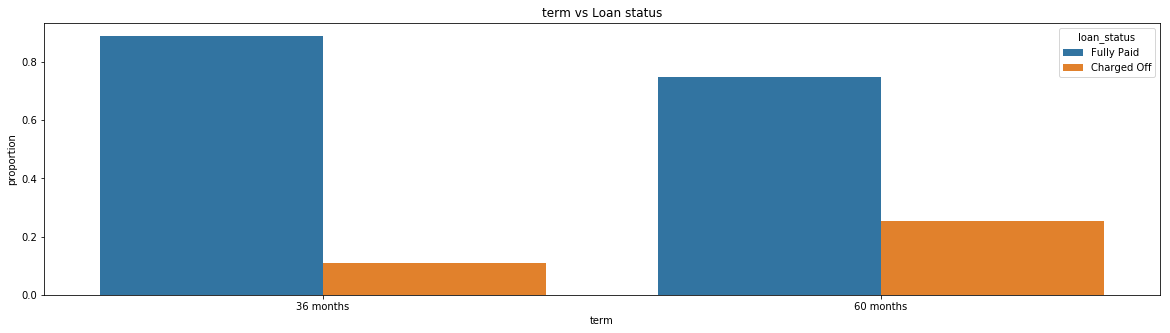

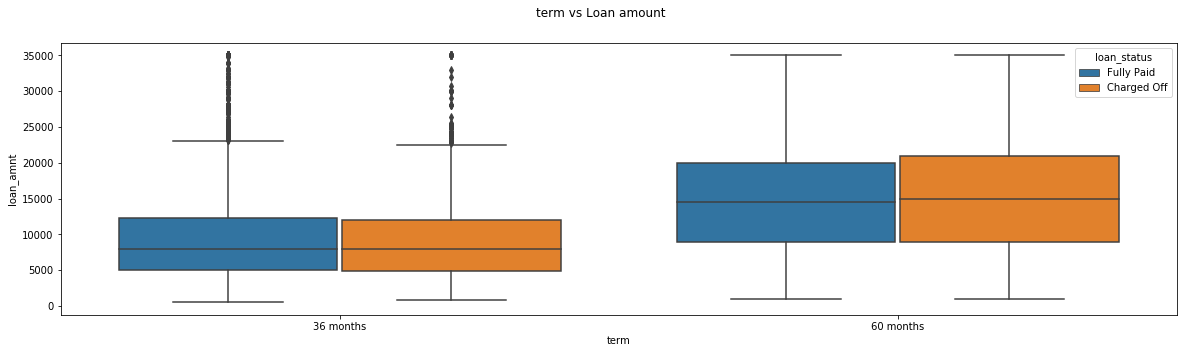

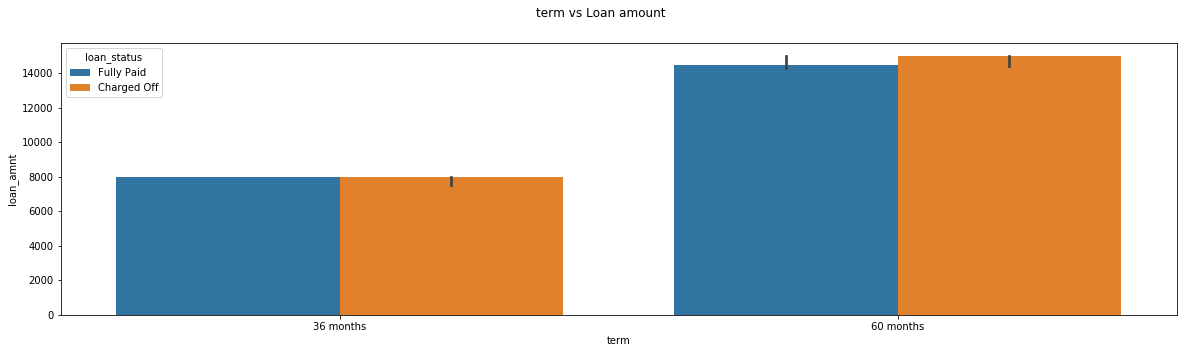

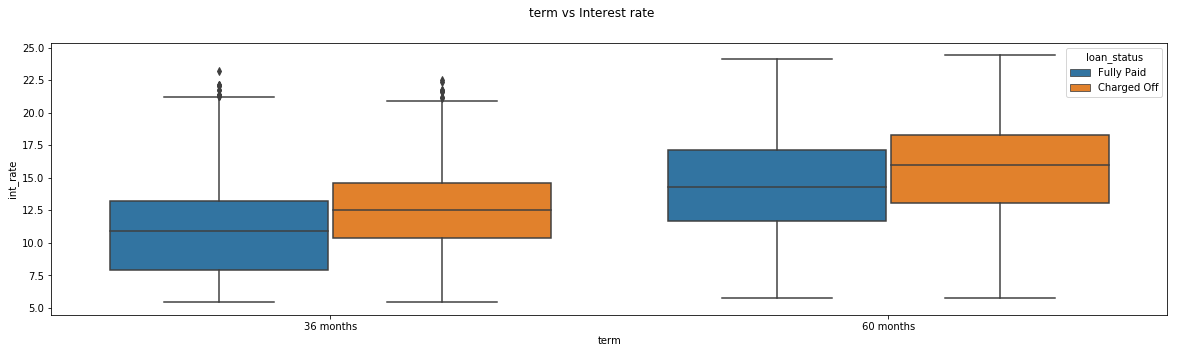

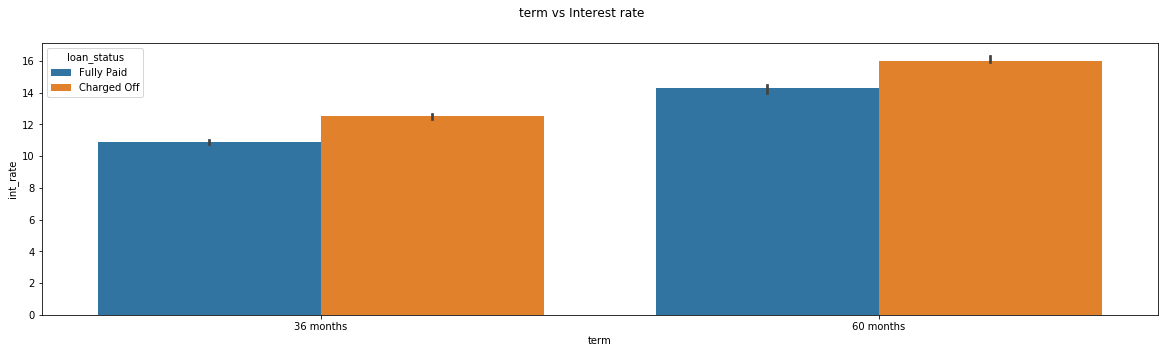

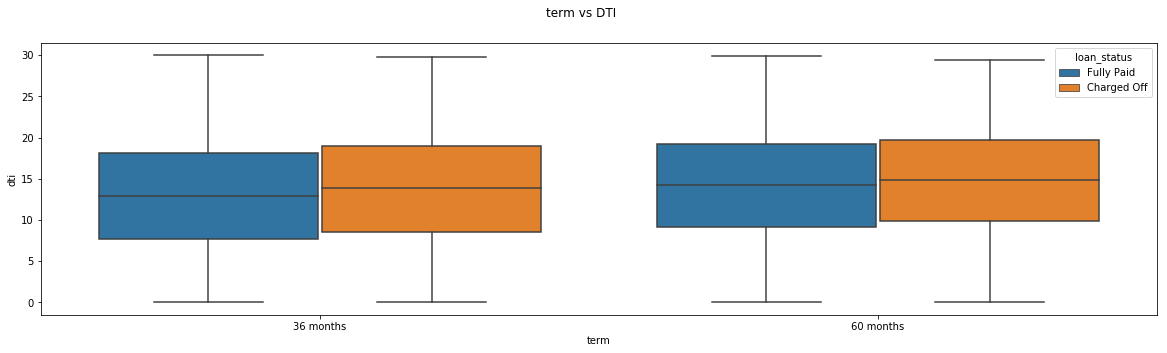

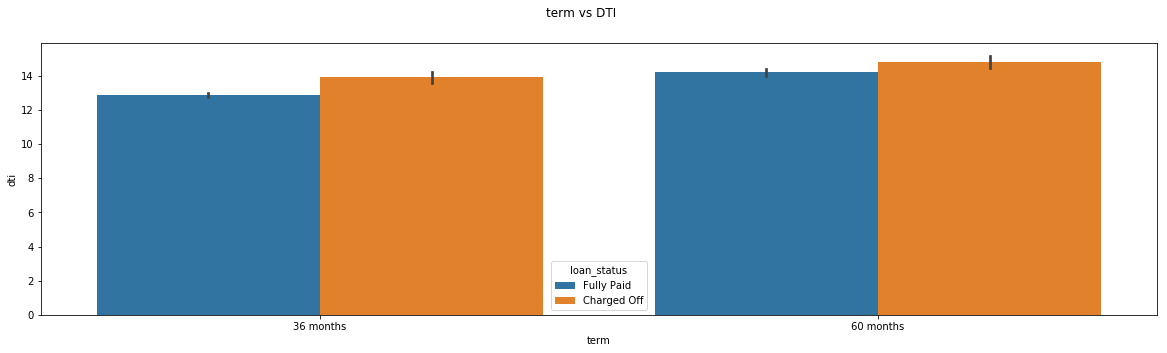

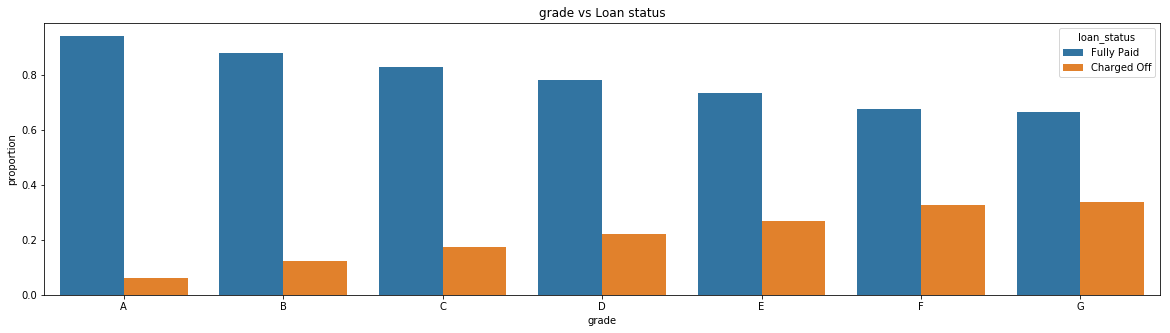

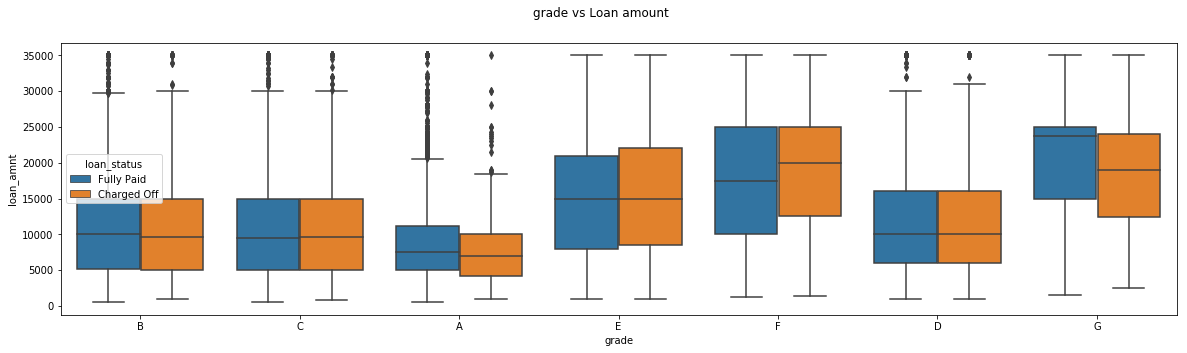

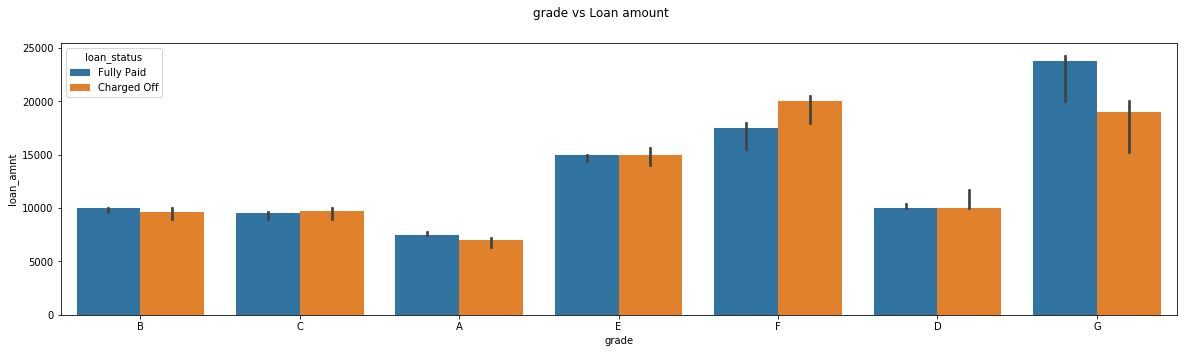

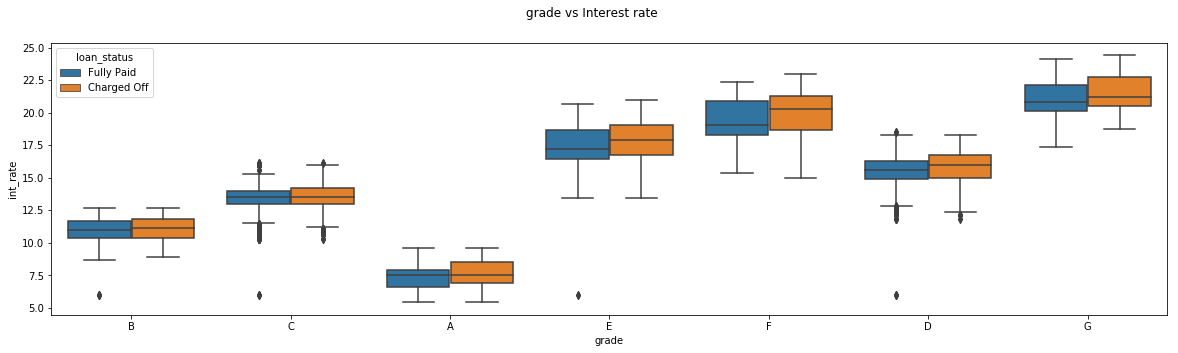

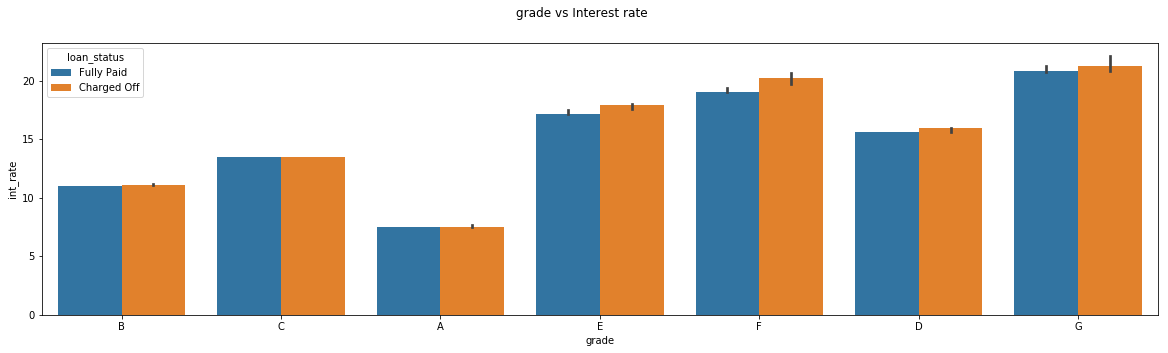

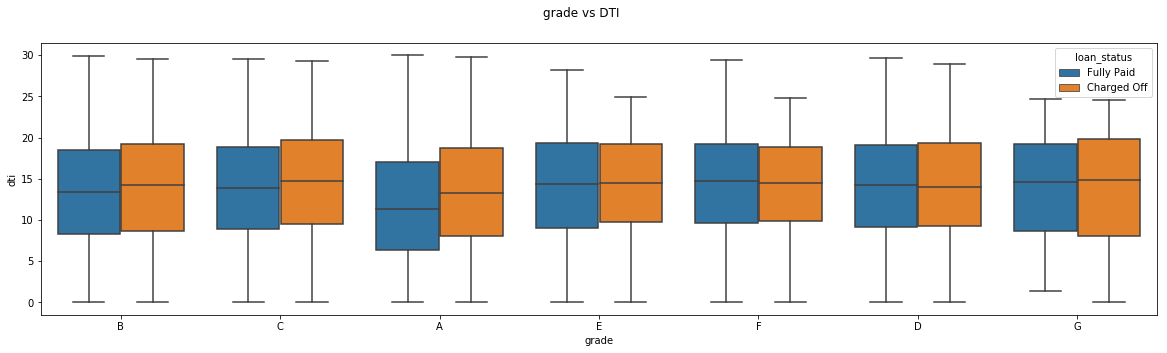

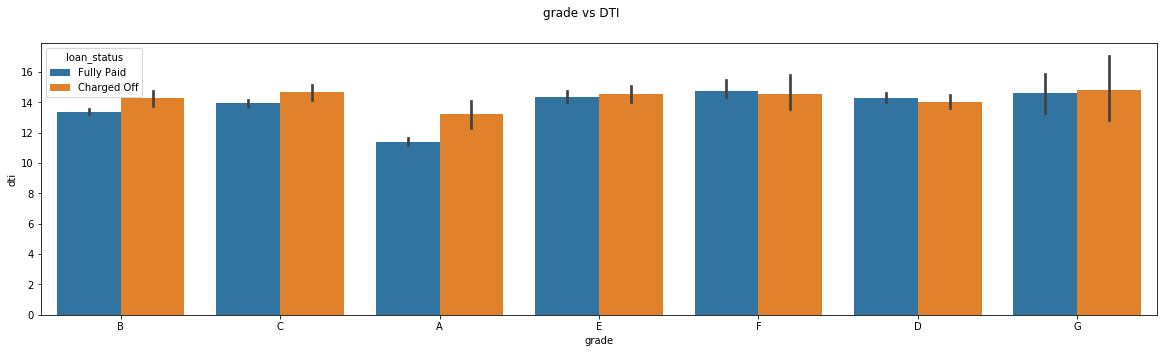

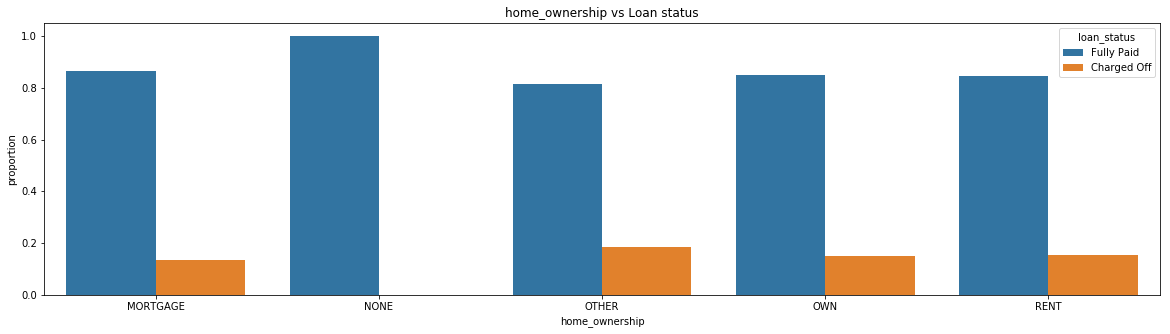

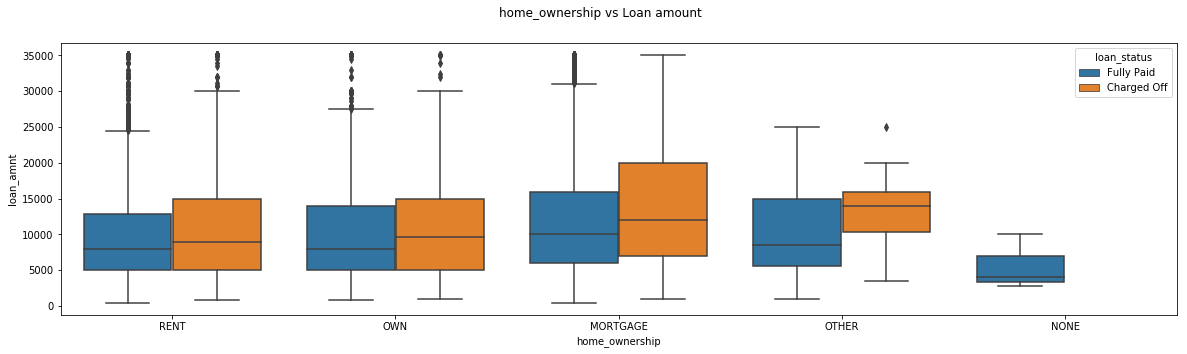

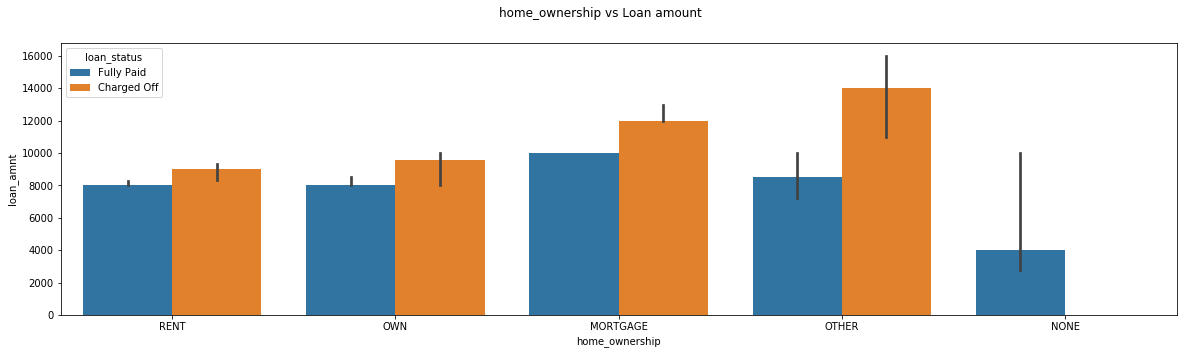

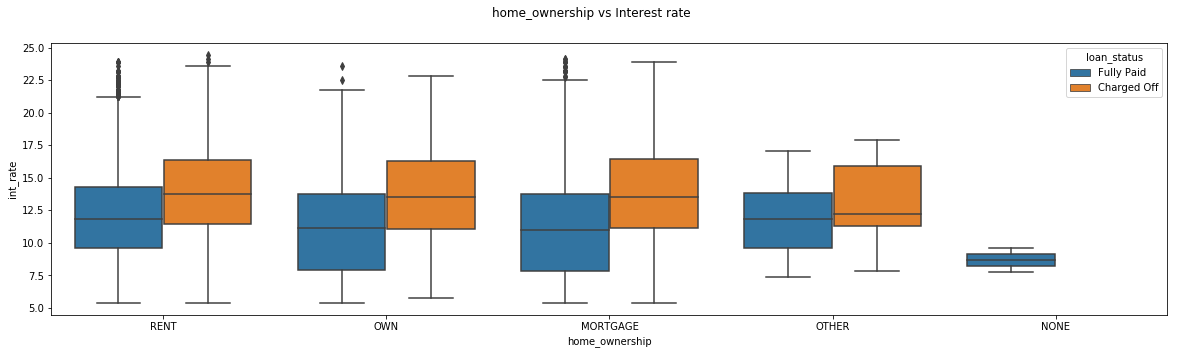

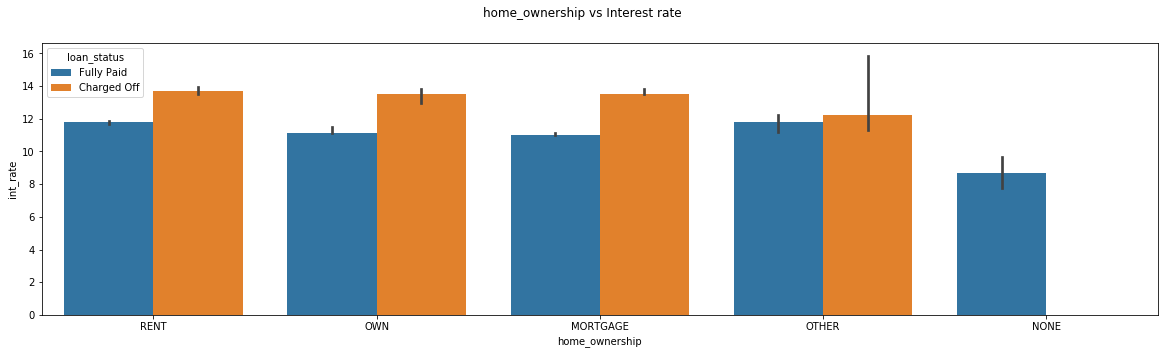

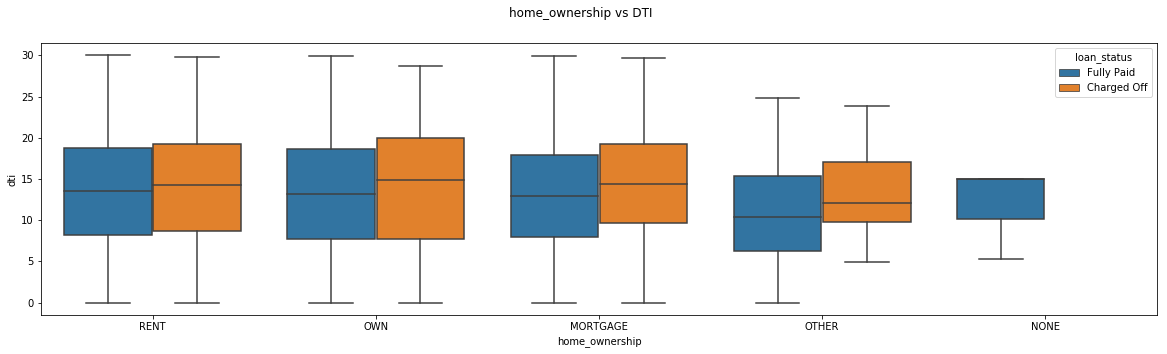

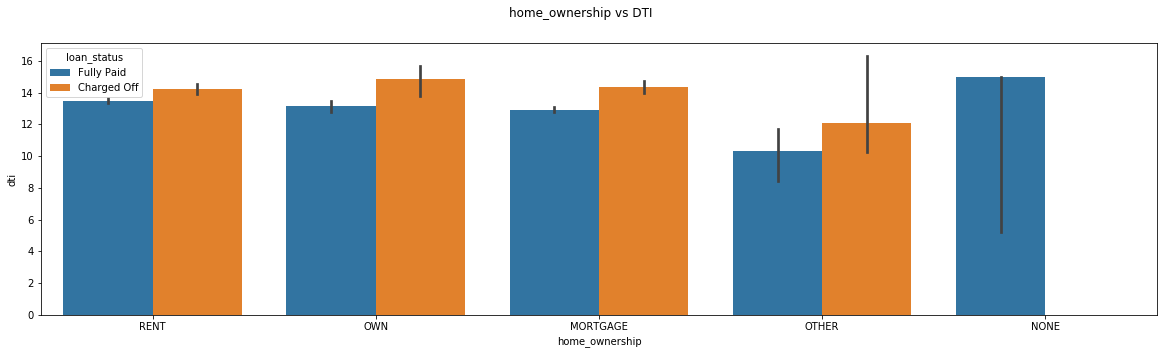

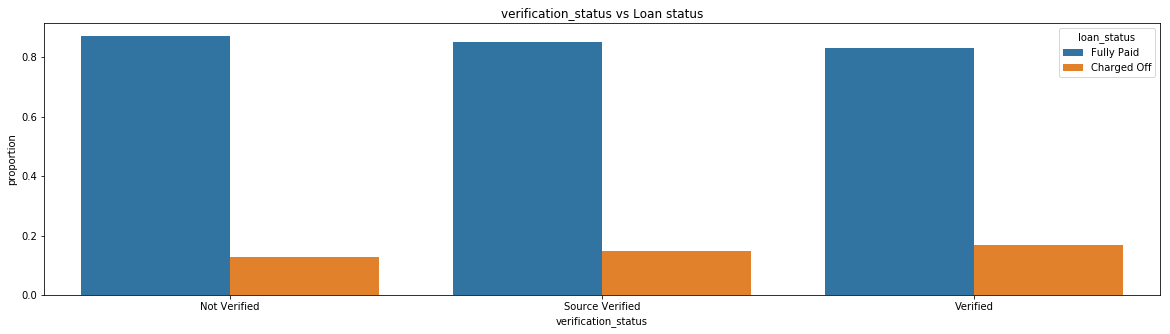

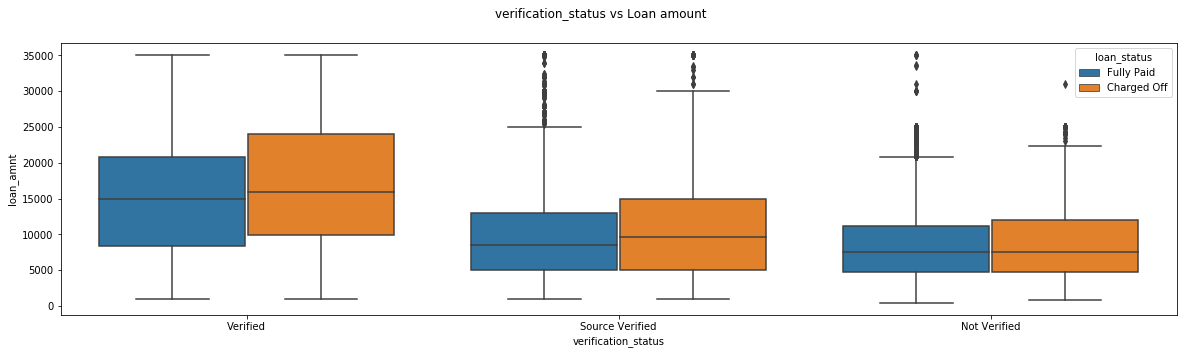

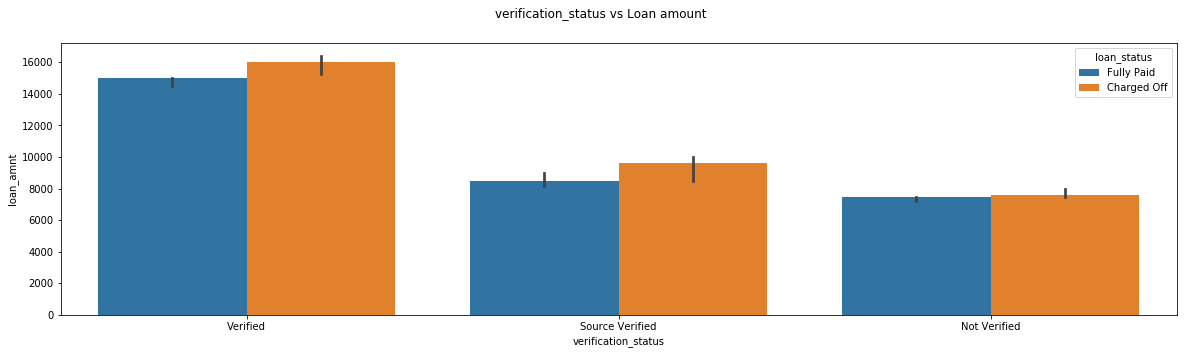

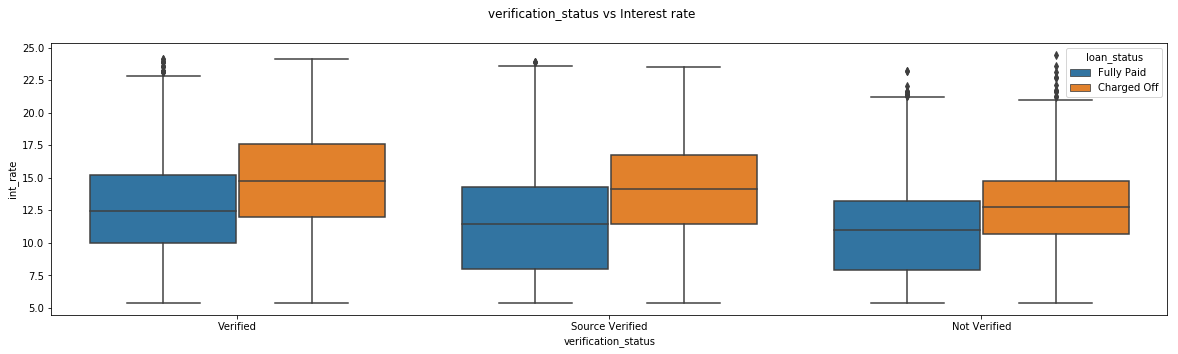

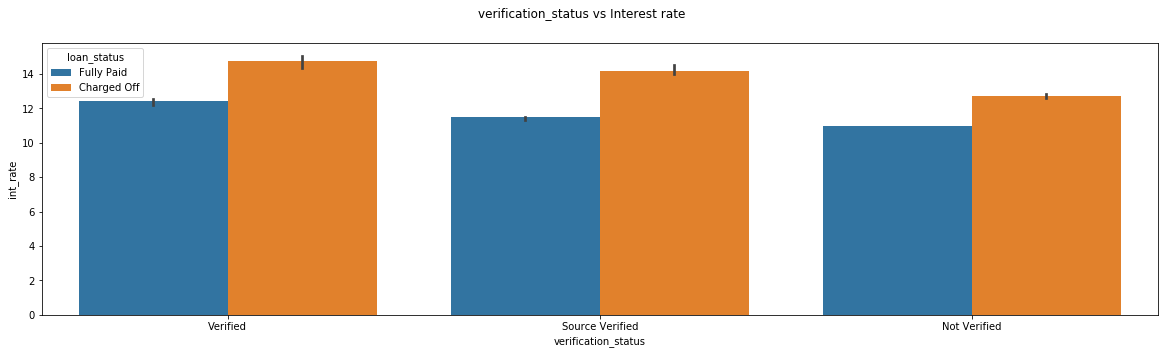

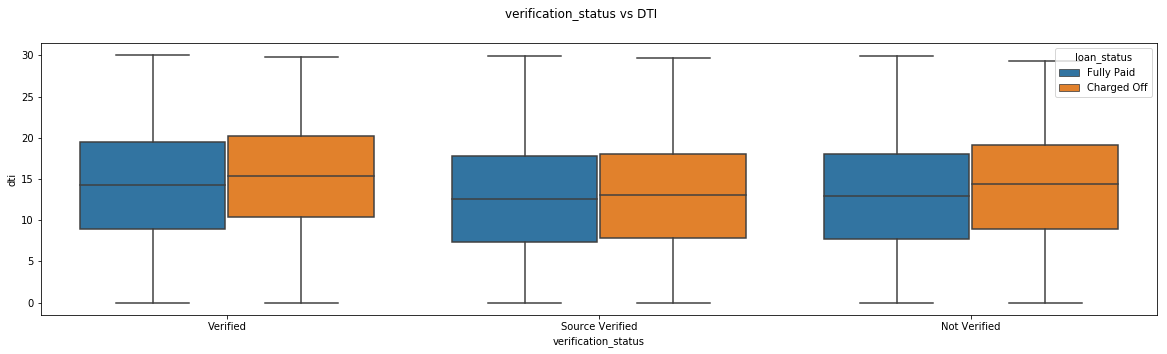

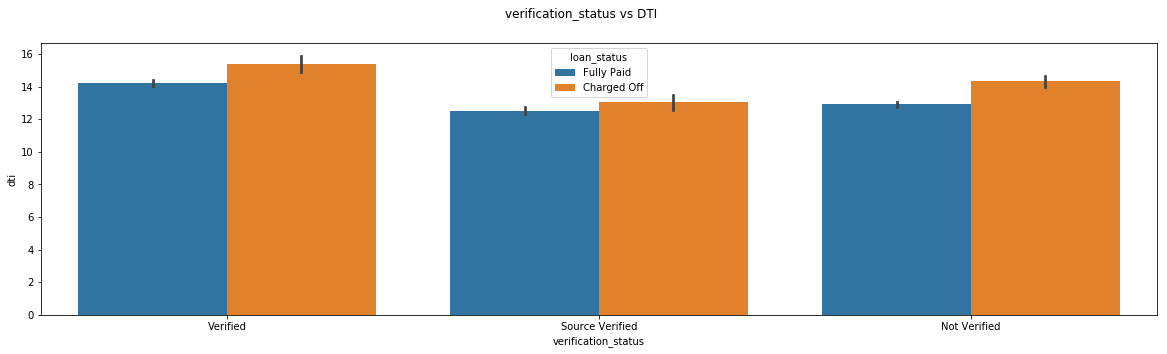

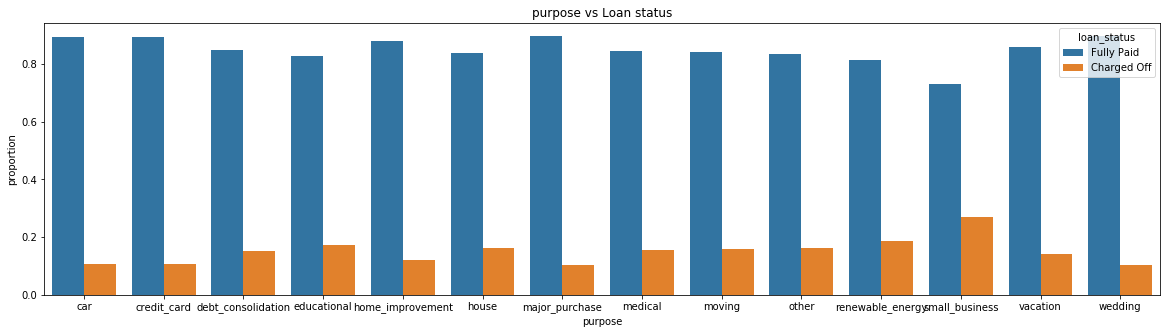

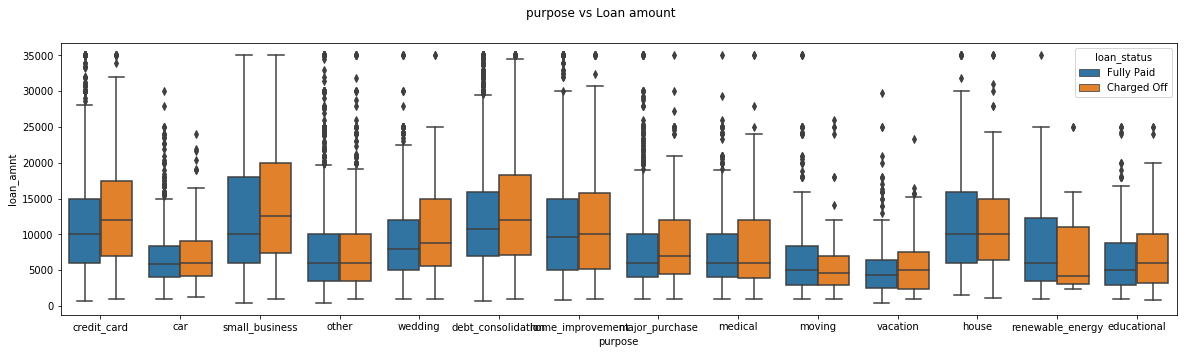

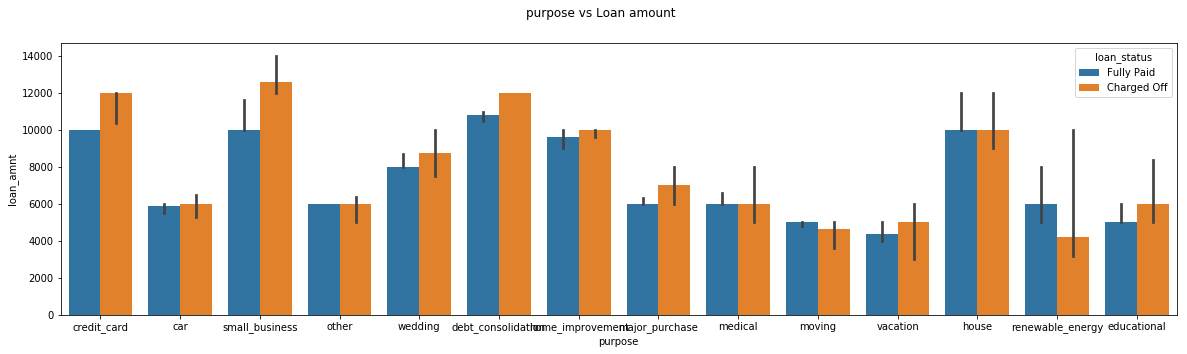

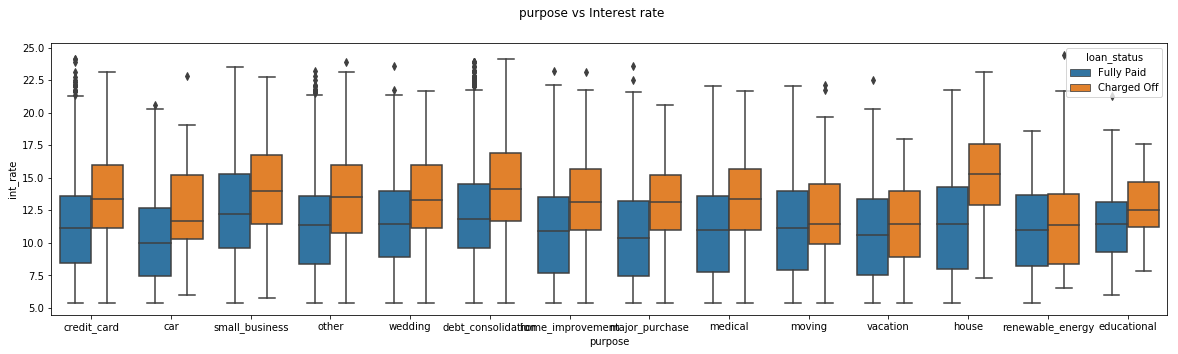

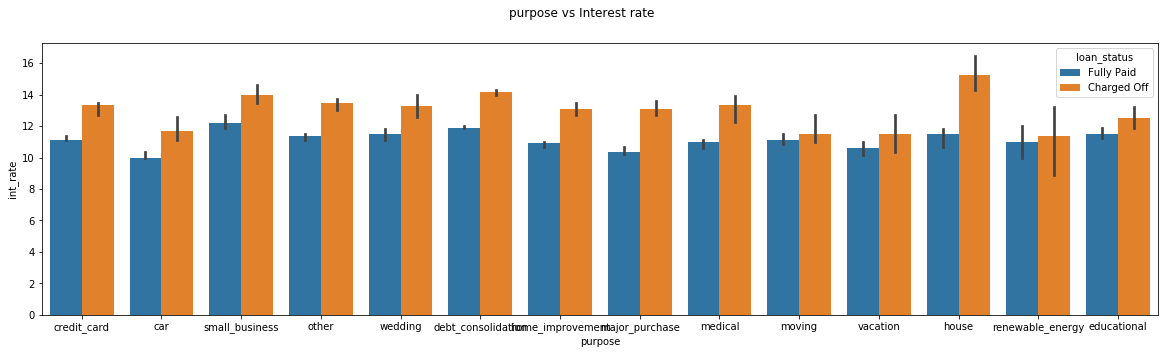

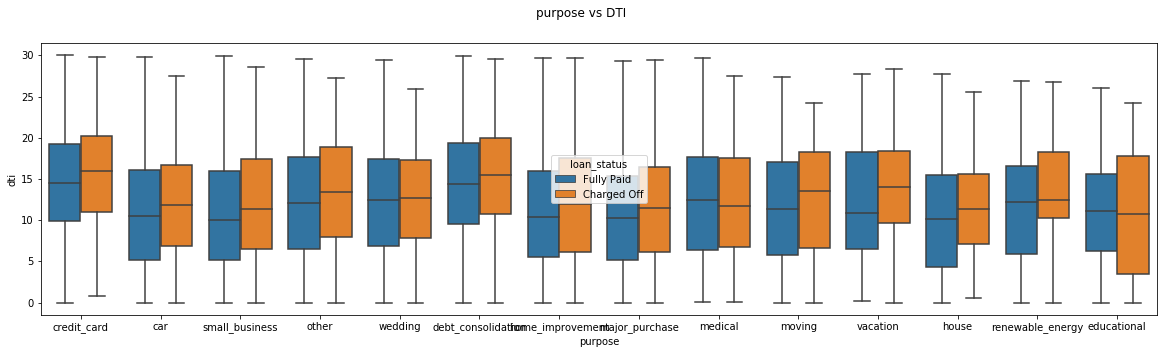

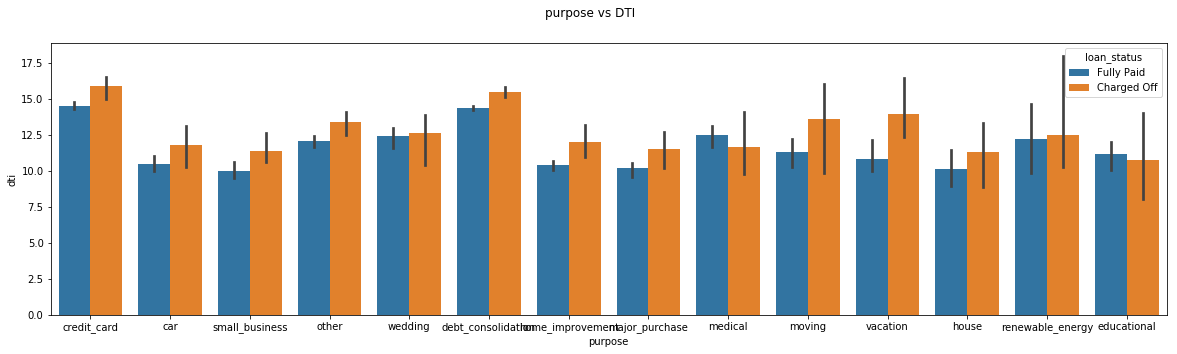

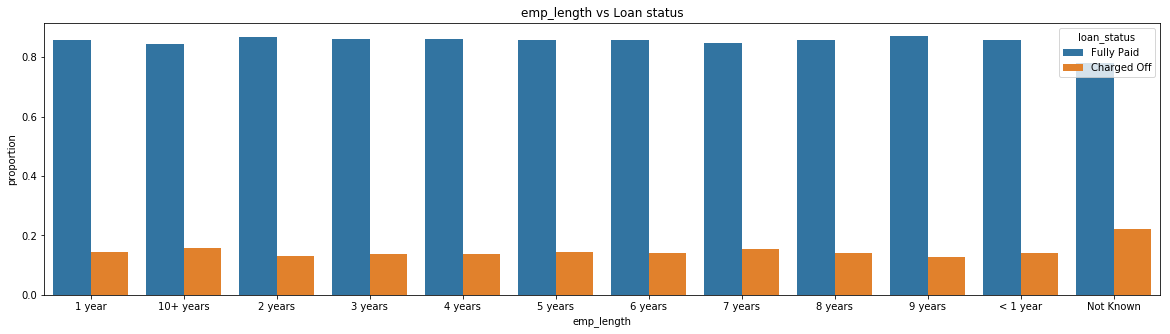

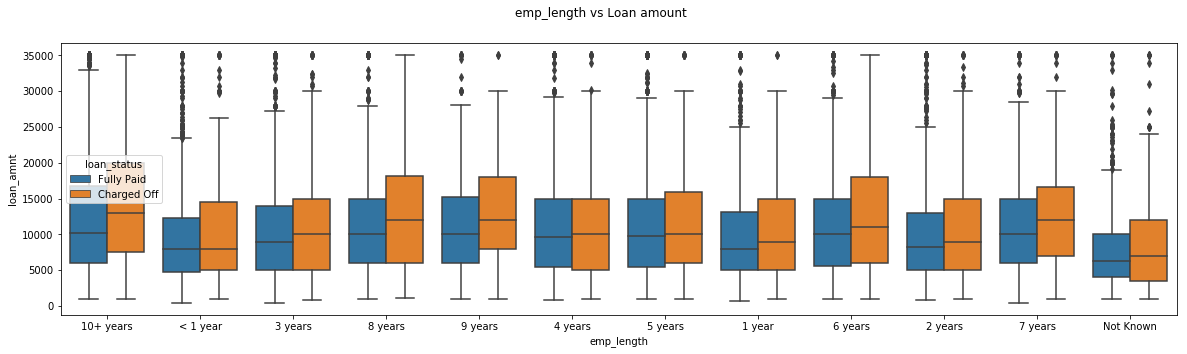

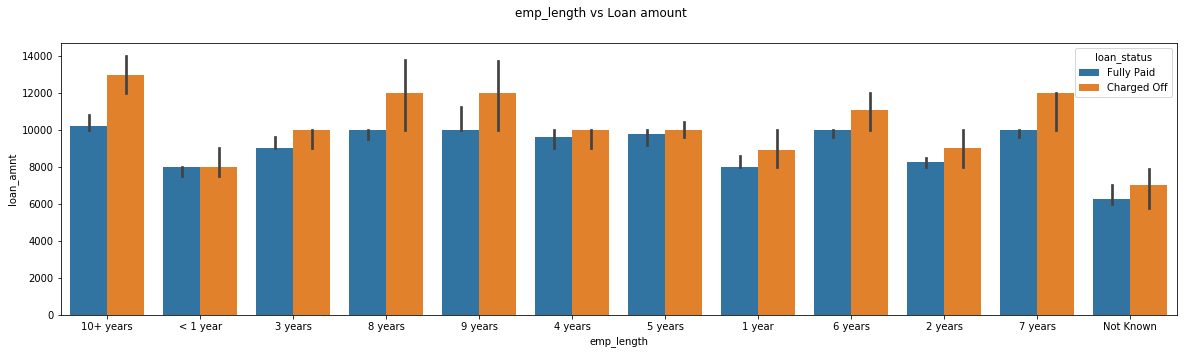

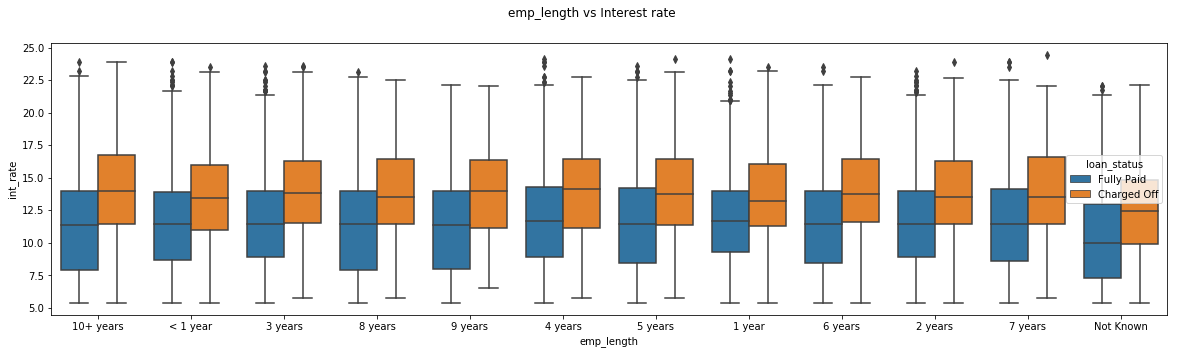

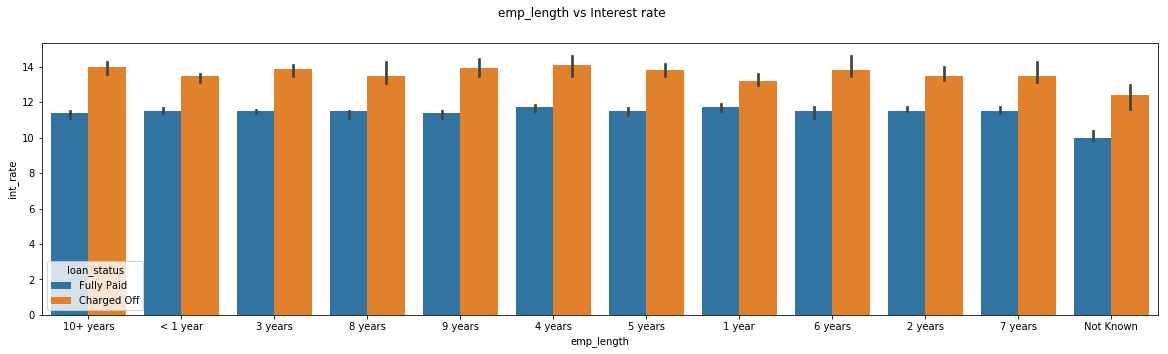

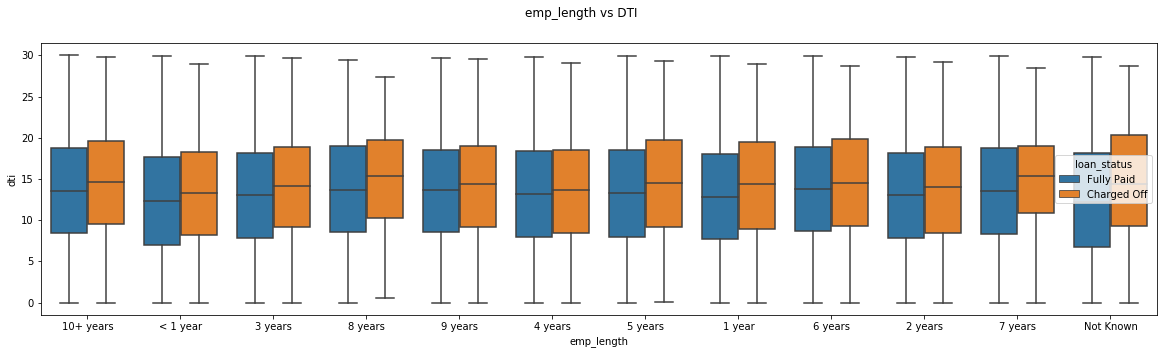

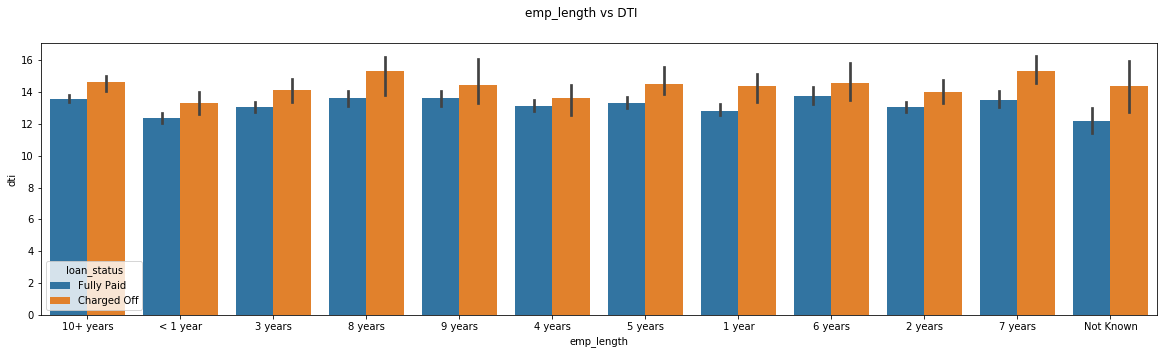

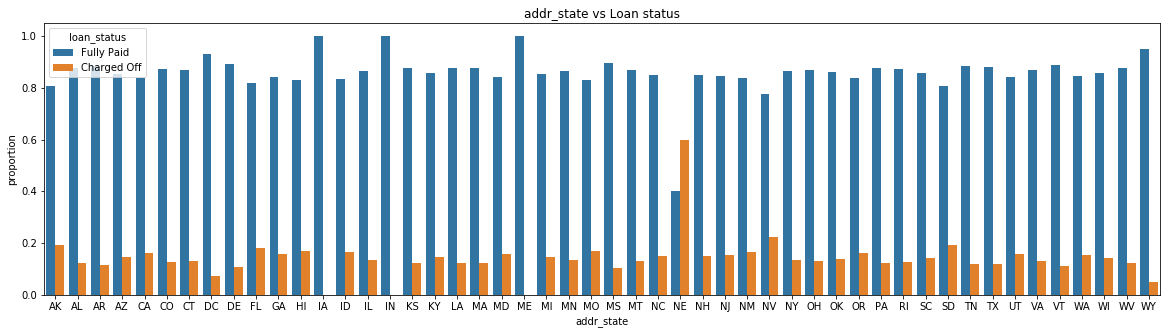

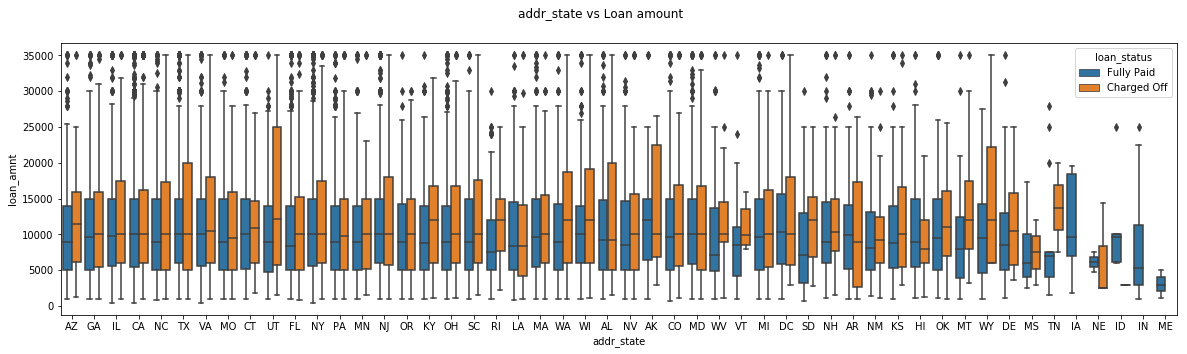

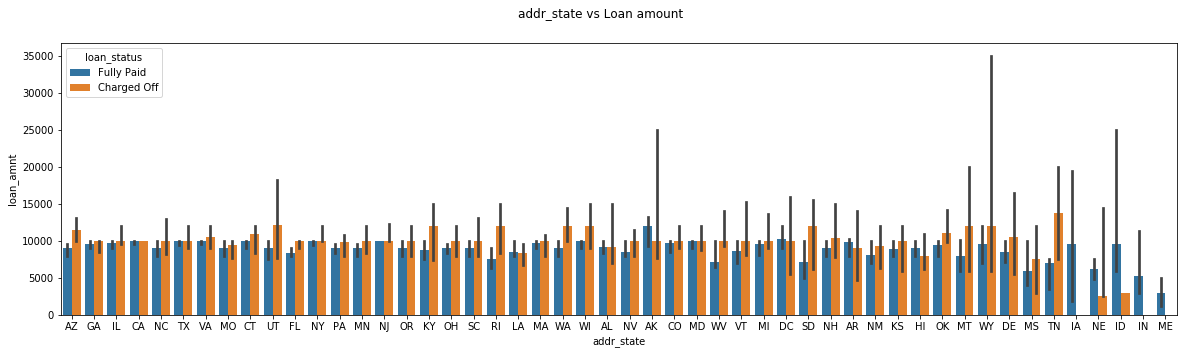

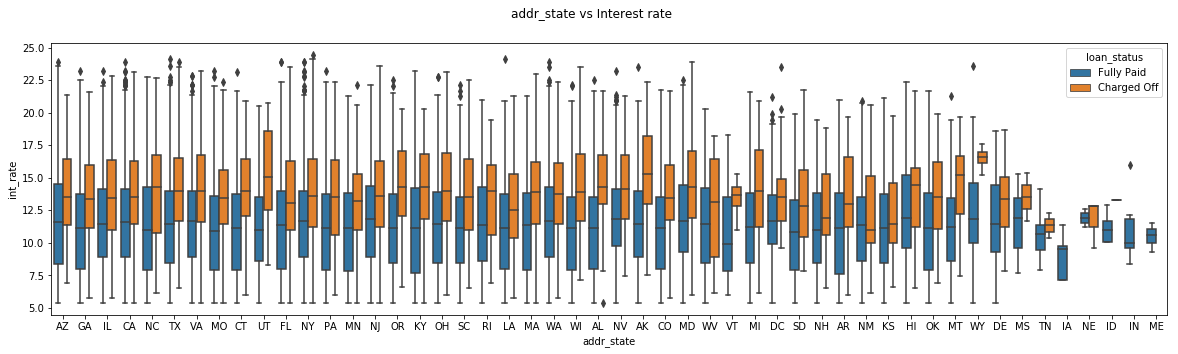

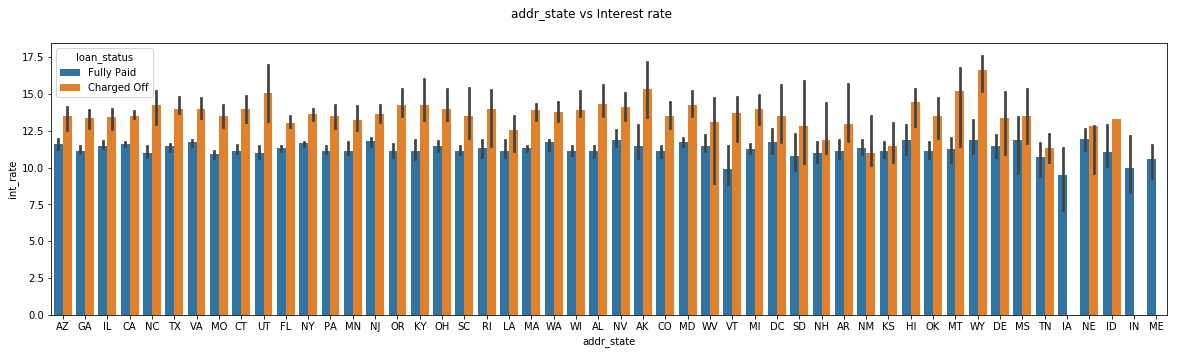

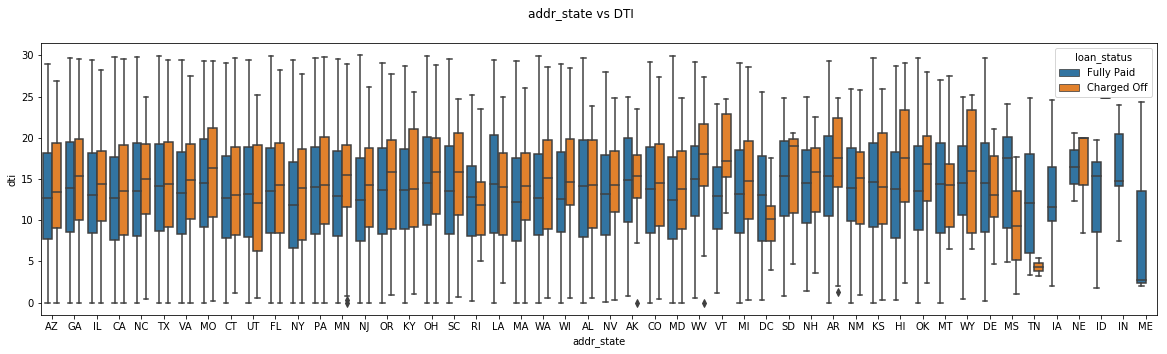

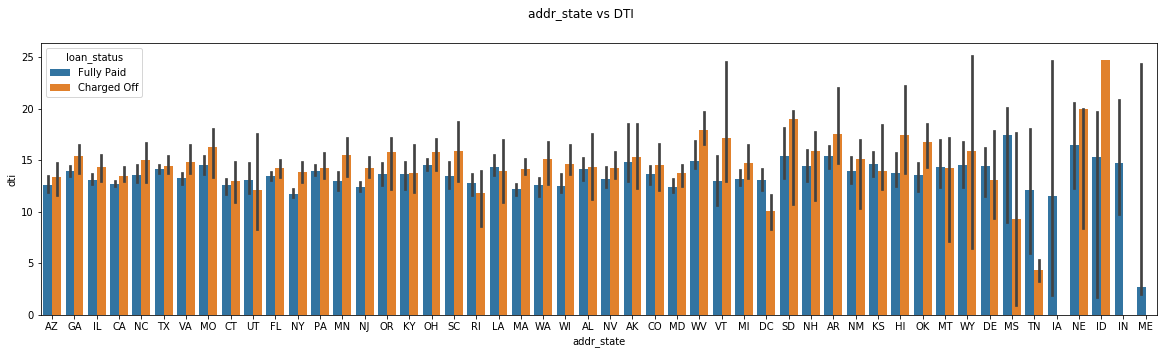

In [86]:
bivar_cols = ['term','grade','home_ownership','verification_status','purpose','emp_length','addr_state']
for var in bivar_cols:
    df_temp = df.groupby([var, 'loan_status'], as_index=False)['id'].count()
    df_temp['proportion'] = df_temp.groupby(var).transform(lambda x: x/x.sum())
    plt.figure(figsize=(20,5))
    sns.barplot(x=var, y='proportion', hue='loan_status', data=df_temp, hue_order = ['Fully Paid', 'Charged Off'])
    plt.title(var+' vs Loan status')

    #loan_amnt
    plt.figure(figsize=(20,5))
    sns.boxplot(x=var, y='loan_amnt', hue='loan_status', data=df)
    plt.suptitle(var+' vs Loan amount')
    plt.figure(figsize=(20,5))
    sns.barplot(x=var, y='loan_amnt', hue='loan_status', data=df, estimator=np.median)
    plt.suptitle(var+' vs Loan amount')
    plt.show()

    #int_rate
    plt.figure(figsize=(20,5))
    sns.boxplot(x=var, y='int_rate', hue='loan_status', data=df)
    plt.suptitle(var+' vs Interest rate')
    plt.figure(figsize=(20,5))
    sns.barplot(x=var, y='int_rate', hue='loan_status', data=df, estimator=np.median)
    plt.suptitle(var+' vs Interest rate')
    plt.show()

    #dti
    plt.figure(figsize=(20,5))
    sns.boxplot(x=var, y='dti', hue='loan_status', data=df)
    plt.suptitle(var+' vs DTI')
    plt.figure(figsize=(20,5))
    sns.barplot(x=var, y='dti', hue='loan_status', data=df, estimator=np.median)
    plt.suptitle(var+' vs DTI')
    plt.show()

## Observations from Bivariate Analysis
### 'term'
#### Higher tenured loans on a high level have a higher chancebto default. However 'loan_amnt' is not a factor behinf the defaulters in both tenure categories.
#### Default rate is high when interest rate is high.
#### Defaulters are higher for both tenures if the DTI is high. This should be factor while approving a loan.
### 'grade'
#### There is a steady increase in defaulters when the grade changes from A-G, in that order. For lower grades 'F' and 'G' there are more difference between charged-off and fully paid, which means the lower grade applicants have taken higher amount of loans and also they are more prone to default the loan.
#### There is a steady increase in interest rate and defaulters as we go from A-G
#### DTI is not a major factor when it comes to grade and loan status together.
### 'employment length'
#### The applicants having 10+ years employment experience have taken high amount of loan and have defaulted more.
#### Loans with higher interest rates have defaulted more across employment lengths.
### 'home_ownership'
#### There is a slight higher default rate in the 'OTHER' category.
#### Loans with higher interest rates have defaulted more across home ownerships.
#### The more the loan amount the more defaulters irrespective of home ownerships.
#### There is equal posibility of home owners defaulting for all the home ownerships.
### 'verification_status'
#### Verified loans are given more loan amounts compared to others.
#### HIgher loan amounts have defaulted for 'verified' category more.
#### Loans with higher interest rates have defaulted more across verification status.
#### 'Verified' applicants having higher DTI default more.
### 'purpose'
#### 'Small Business' have higher defaulters.
####  'House' has higher defaults compared to others when the interest rate is high.
### 'addr_state'
#### Huge numer od defaults in the state 'NE'.
#### 'UT','WY','AK' have high defaulters with high loan amounts.
#### 'UT','WY','AK' have high defaulters with high interest rates.
#### 
